In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from operator import itemgetter 
sns.set(style='white', context='talk') #Estilo dos gráficos

In [2]:
base_dados = pd.read_excel('base_de_dados.xlsx')

## Importação e visualização da base de dados

In [3]:
base_dados

,Agencia,Exercicio_Apurado,Num_Processo,Ministerio,Tipo_Processo,Tipo_Alterado,Status_Processo,Data_Autuacao,Data_Encerramento,Relator,...,Unidade_Tecnica_Por_Agir,Confidencialidade,quant_responsaveis,decisao_normativa,instrucao_normativa,deliberacoes_quantidade,determinacoes,recomendacoes,sancoes,alerta
0,I,2010.0,1,a,PC - Prestação de Contas,NÃO,Encerrado,40772.0,41603,ALC,...,B,Restrito,5,DN 2010-110,IN 2008-057; IN 2010-063,1.0,Não,Sim,Não,Não
1,I,2002.0,2,a,PC - Prestação de Contas,NÃO,Encerrado,37789.0,38484,JN,...,A,Restrito,5,N/D,IN 2000-037; IN 2002-042; IN 2002-045,1.0,Sim,Não,Não,Não
2,I,2004.0,3,a,PC - Prestação de Contas,SIM,Encerrado,38512.0,39127,BZ,...,B,Restrito,5,DN 2004-062,IN 2002-045; IN 2004-047,1.0,Sim,Não,Não,Não
3,I,2006.0,4,a,PC - Prestação de Contas,NÃO,Encerrado,39269.0,39968,WR,...,A,Restrito,5,DN 2006-081,IN 2004-047,1.0,Sim,Não,Não,Não
4,I,2009.0,5,a,PC - Prestação de Contas,NÃO,Encerrado,40386.0,40612,ALC,...,B,Restrito,5,DN 2009-102,IN 2008-057,1.0,Não,Sim,Não,Sim
5,I,2007.0,6,a,PC - Prestação de Contas,NÃO,Encerrado,39659.0,39986,WR,...,A,Restrito,5,DN 2007-085,IN 2004-047; IN 2007-054,1.0,Não,Não,Não,Não
6,I,2008.0,7,a,PC - Prestação de Contas,NÃO,Encerrado,40000.0,40312,JN,...,B,Restrito,5,DN 2008-094,IN 2007-054; IN 2008-057,1.0,Sim,Sim,Não,Sim
7,I,2013.0,8,a,PC - Prestação de Contas,NÃO,Encerrado,41857.0,N/D,Mc,...,A,Restrito,5,DN 2013-132,IN 2010-063; IN 2013-072,1.0,Não,Não,Não,Não
8,II,2010.0,030.976/2011-1,b,PC - Prestação de Contas,NÃO,Encerrado,40807.0,41416,WR,...,B,Restrito,5,DN 2010-110,IN 2008-057; IN 2010-063,1.0,Sim,Não,Não,Não
9,II,2009.0,022.996/2010-9,b,PC - Prestação de Contas,NÃO,Encerrado,40409.0,41359,WR,...,A,Restrito,5,DN 2009-102,IN 2008-057,1.0,Não,Não,Não,Não


## Tratamento superficial da base

In [4]:
base_dados.fillna('*', inplace=True) # Atrubui * aos valores que nao foram inseridos na base 
base_dados = base_dados[base_dados['Agencia'] != '*'] # Excluo os dados inválidos

In [5]:
base_dados

,Agencia,Exercicio_Apurado,Num_Processo,Ministerio,Tipo_Processo,Tipo_Alterado,Status_Processo,Data_Autuacao,Data_Encerramento,Relator,...,Unidade_Tecnica_Por_Agir,Confidencialidade,quant_responsaveis,decisao_normativa,instrucao_normativa,deliberacoes_quantidade,determinacoes,recomendacoes,sancoes,alerta
0,I,2010,1,a,PC - Prestação de Contas,NÃO,Encerrado,40772,41603,ALC,...,B,Restrito,5,DN 2010-110,IN 2008-057; IN 2010-063,1,Não,Sim,Não,Não
1,I,2002,2,a,PC - Prestação de Contas,NÃO,Encerrado,37789,38484,JN,...,A,Restrito,5,N/D,IN 2000-037; IN 2002-042; IN 2002-045,1,Sim,Não,Não,Não
2,I,2004,3,a,PC - Prestação de Contas,SIM,Encerrado,38512,39127,BZ,...,B,Restrito,5,DN 2004-062,IN 2002-045; IN 2004-047,1,Sim,Não,Não,Não
3,I,2006,4,a,PC - Prestação de Contas,NÃO,Encerrado,39269,39968,WR,...,A,Restrito,5,DN 2006-081,IN 2004-047,1,Sim,Não,Não,Não
4,I,2009,5,a,PC - Prestação de Contas,NÃO,Encerrado,40386,40612,ALC,...,B,Restrito,5,DN 2009-102,IN 2008-057,1,Não,Sim,Não,Sim
5,I,2007,6,a,PC - Prestação de Contas,NÃO,Encerrado,39659,39986,WR,...,A,Restrito,5,DN 2007-085,IN 2004-047; IN 2007-054,1,Não,Não,Não,Não
6,I,2008,7,a,PC - Prestação de Contas,NÃO,Encerrado,40000,40312,JN,...,B,Restrito,5,DN 2008-094,IN 2007-054; IN 2008-057,1,Sim,Sim,Não,Sim
7,I,2013,8,a,PC - Prestação de Contas,NÃO,Encerrado,41857,N/D,Mc,...,A,Restrito,5,DN 2013-132,IN 2010-063; IN 2013-072,1,Não,Não,Não,Não
8,II,2010,030.976/2011-1,b,PC - Prestação de Contas,NÃO,Encerrado,40807,41416,WR,...,B,Restrito,5,DN 2010-110,IN 2008-057; IN 2010-063,1,Sim,Não,Não,Não
9,II,2009,022.996/2010-9,b,PC - Prestação de Contas,NÃO,Encerrado,40409,41359,WR,...,A,Restrito,5,DN 2009-102,IN 2008-057,1,Não,Não,Não,Não


Dessa maneira, os dados iniciais a partir da linha 127 que, aparentemente haviam sido inseridos de forma erronêa, foram excluidos, deixando a tabela com os dados reais e válidos.

Seria possível excluir os mesmos dados diretamente do arquivo xlsx, pois a quantidade de dados não era tão grande, no entanto, imaginando uma situação em que a quantidade de dados inválidos fosse extremamente grande, é melhor automatizar a tarefa. 

## Início da análise
### Relação da quantidade de processos com as agências

A) Análise da quantidade de processos em relação a todas as agências <br>
B) Análise da quantidade de processos em relação a uma agência específica com base no status do processo

## Análise da quantidade de processos com base em todas as agencias

In [6]:
pd.concat(g for _, g in base_dados.groupby("Num_Processo") if len(g) > 1) # Verificação para processos repetidos

,Agencia,Exercicio_Apurado,Num_Processo,Ministerio,Tipo_Processo,Tipo_Alterado,Status_Processo,Data_Autuacao,Data_Encerramento,Relator,...,Unidade_Tecnica_Por_Agir,Confidencialidade,quant_responsaveis,decisao_normativa,instrucao_normativa,deliberacoes_quantidade,determinacoes,recomendacoes,sancoes,alerta
74,VI,1999,006.202/2000-3,f,PC - Prestação de Contas,SIM,Encerrado,36663,39650,WR,...,B,Restrito,5,N/D,IN 1998-026; IN 1999-029; IN 1999-030; IN 1999...,2,Não,Não,Sim,Não
126,VI,1999,006.202/2000-3,f,PC - Prestação de Contas,SIM,Encerrado,36663,39650,WR,...,B,Restrito,5,N/D,IN 1998-026; IN 1999-029; IN 1999-030,2,Sim,Não,Sim,Não
45,V,2003,009.059/2004-1,f,PC - Prestação de Contas,IX,Encerrado,38155,38918,WR,...,A,Restrito,5,N/D,IN 2002-045,1,Sim,Não,Não,Não
125,V,2003,009.059/2004-1,f,PC - Prestação de Contas,NÃO,Encerrado,38155,38918,WR,...,A,Restrito,5,N/D,IN 2002-045,1,Sim,Não,Não,Não


A partir dessas informações é possível se chegar a algumas conclusões: <br>

1) Se o número de processos total é de 127, com dois processos repetidos, torna-se 125. <br>
2) Os processos de número 006.202/2000-3 apresentam algumas suspeitas, como por exemplo: Ambos possuem a mesma data de autuação e encerramento, assim como o mesmo relator. No entanto, os processos diferem em Unidade técnicas responsáveis, instruções normativas e determinações. <br>
3) Os processos de número 009.059/2004-1 também diferem em Unidade técnica responsável tendo a mesma data de autuação e encerramento, além disso, há um dado inválido na coluna "Tipo_Alterado" em um dos processos. 

In [7]:
base_dados.drop(base_dados.index[126], inplace=True) #Excluo os processos repetidos
base_dados.drop(base_dados.index[45], inplace=True) 

total_processos = len(base_dados.Num_Processo.unique()) #Calculo o total de processos sem os processos repetidos

nomes_agencias = base_dados.Agencia.unique()
agencia_numprocesso = {}

for x in nomes_agencias:
    agencia_numprocesso[x] = len(base_dados[base_dados['Agencia'] == x].Num_Processo.unique())
    
agencia_numprocesso # Dicionário pra facilitar a manipulação na hora de plotar os gráficos
                    # onde a chave é o nome da agência e os valores são a quantidade de processos de cada agência

/anaconda3/envs/FGV/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


{'I': 12,
 'II': 7,
 'III': 19,
 'VIII': 10,
 'V': 16,
 'VI': 16,
 'VII': 14,
 'IX': 26,
 'IV': 5}

## Gráficos estáticos
### Matplotlib
Os gráficos da biblioteca matplotlib em geral são inferiores aos gráficos da biblioteca seaborn, por isso, ao decorrer desse notebook, os gráficos seaborn serão vistos com mais frequência.

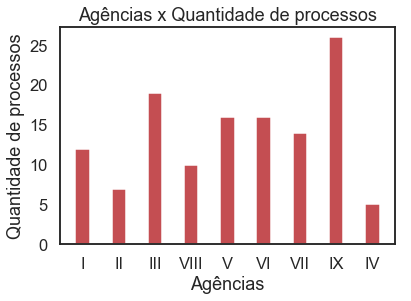

In [8]:
%matplotlib inline

agencias = list(agencia_numprocesso.keys()) # Essa variável será usada ao decorrer do notebook.

fig, ax = plt.subplots()

bar_width = 0.40

barras = ax.bar(list(agencia_numprocesso.keys()), list(agencia_numprocesso.values()), bar_width, color='r')
ax.set_xlabel('Agências')
ax.set_ylabel('Quantidade de processos')
ax.set_title('Agências x Quantidade de processos')
plt.show()

## Seaborn

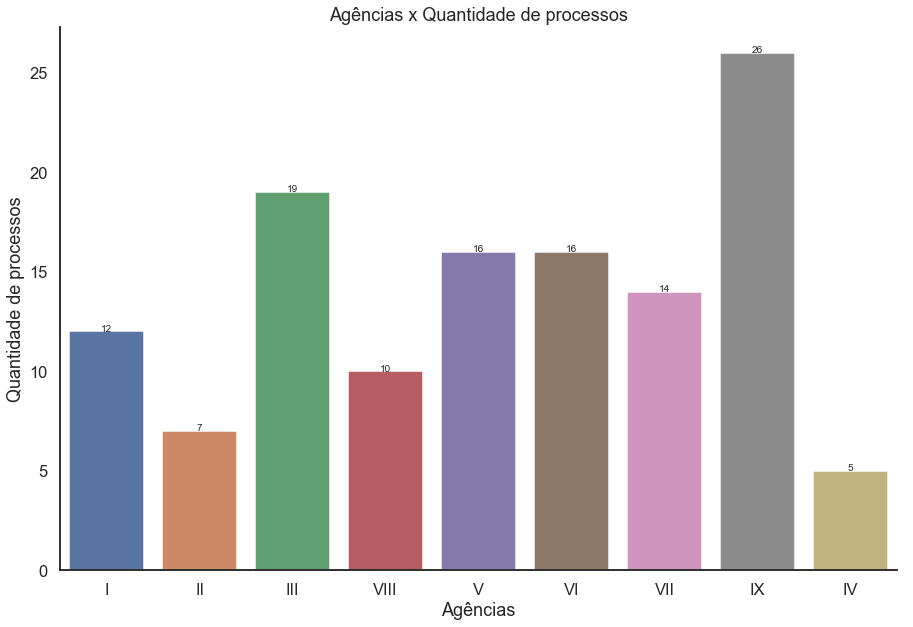

In [9]:

plt.rcParams['figure.figsize'] = [15, 10] # É possível definir o tamanhos de todos os gráficos a partir desse método
                                        # no entanto, para uma melhor visualização, pode-se usar antes de cada gráfico


f, ax = plt.subplots()
sns.barplot(x=agencias, y=list(agencia_numprocesso.values()), ax=ax)
ax.set_ylabel("Quantidade de processos")
ax.set_xlabel("Agências")
ax.set_title('Agências x Quantidade de processos')
sns.despine(offset=0, trim=False)
for p in ax.patches: #Loop para inserção do valor em cada barra do gráfico
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:.0f}'.format(height),
            ha="center") 
plt.show()

## Porcentagens de processos por agência

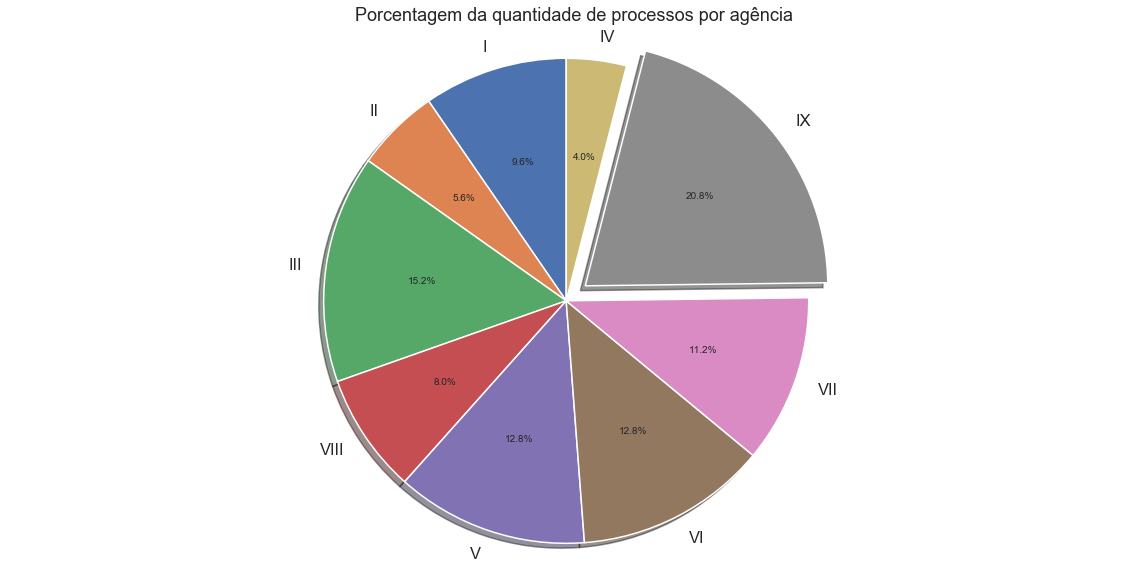

In [10]:
porcentagens = np.array(list(agencia_numprocesso.values()))
porcentagens = (porcentagens * 100) / total_processos

plt.rcParams['figure.figsize'] = [20, 10]
fig1, ax1 = plt.subplots()

explode = (0,0,0,0,0,0,0,0.1,0) # Defino qual a fatia e quanto ela será destaca do gráfico
ax1.pie(porcentagens, labels=agencias, autopct='%0.1f%%',
        shadow=True, startangle=90, explode=explode)
ax1.axis('equal') # equal é o que define o gráfico como um circulo
ax1.set_title("Porcentagem da quantidade de processos por agência")

plt.show()

## Conclusão da análise da quantidade de processos x agência

Inicialmente relatou-se a necessidade de manipulação na base de dados, uma vez que haviam dados repetidos (esses inseridos incorretamente ou tratavam-se de alguma irregularidade). 

Por fim, ficou clara a predominância da empresa IX em relação a quantidade de processos total, assumindo 20.8% dos processos. A empresa IV foi a que apresentou a menor quantidade de processos, com um total de 4% dos processos.

## Análise da quantidade de processos (por status) em todas as agências 

In [11]:
agencia_processos_status = {} # Dicionário "aninhados" com o número de processos encerrados e abertos por agência
                            # A chave principal será o nome de cada agência e seu valor será um dicionário contendo 
                            # as chaves "Encerrado" e "Aberto" contendo como valor as quantidades respectivas

for x in agencias: # População do dicionário
    agencia_processos_status[x] = {'Encerrado': len(base_dados[(base_dados['Agencia'] == x) & (base_dados['Status_Processo'] == 'Encerrado')]), 'Aberto': len(base_dados[(base_dados['Agencia'] == x) & (base_dados['Status_Processo'] == 'Aberto')])}

    
qnt_processos_encerrados = [] # Em casos onde o código seria muito grande, a criação de listas torna o código mais legível 
qnt_processos_abertos = []
for ag in agencia_processos_status:
    qnt_processos_encerrados.append(agencia_processos_status[ag]['Encerrado'])
    qnt_processos_abertos.append(agencia_processos_status[ag]['Aberto'])


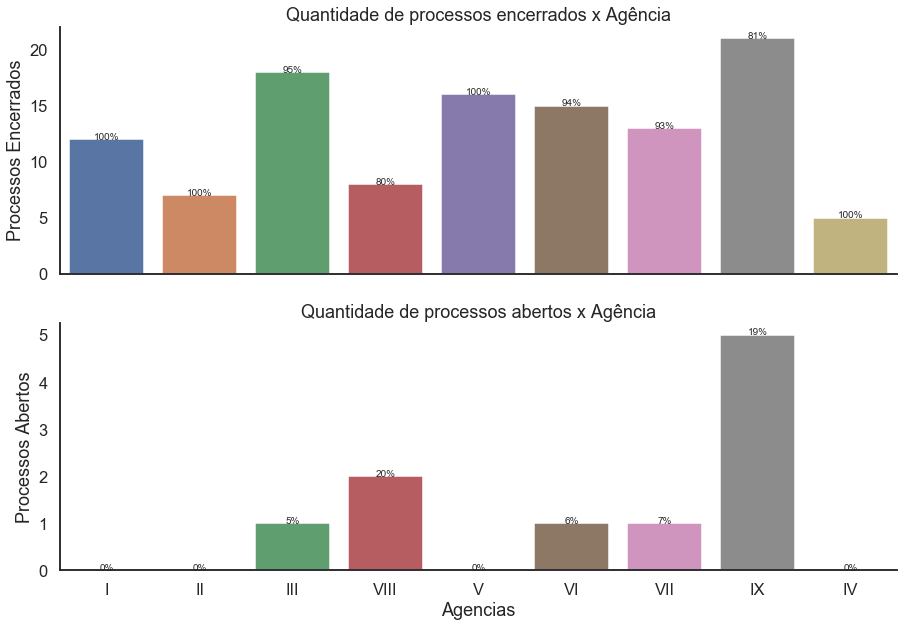

In [12]:

    
f, (ax, ax1) = plt.subplots(2, figsize = (15,10), sharex=True)

sns.barplot(x=agencias, y=qnt_processos_encerrados, ax=ax)
sns.despine(offset=0, trim=False)
ax.set_ylabel("Processos Encerrados")
ax.set_title("Quantidade de processos encerrados x Agência")

aux = 0
for p in ax.patches: #Loop para inserção da porcentagem em cada barra do gráfico
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:.0%}'.format(height/(qnt_processos_encerrados[aux] + qnt_processos_abertos[aux])),
            ha="center") 
    aux += 1

sns.barplot(x=agencias, y=qnt_processos_abertos, ax=ax1)
sns.despine(offset=0, trim=False)
ax1.set_ylabel("Processos Abertos")
ax1.set_xlabel("Agencias")
ax1.set_title("Quantidade de processos abertos x Agência")


aux1 = 0
for p in ax1.patches:#Loop para inserção da porcentagem em cada barra do gráfico

    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height,
            '{:.0%}'.format(height/(qnt_processos_encerrados[aux1] + qnt_processos_abertos[aux1])),
            ha="center") 
    aux1 += 1


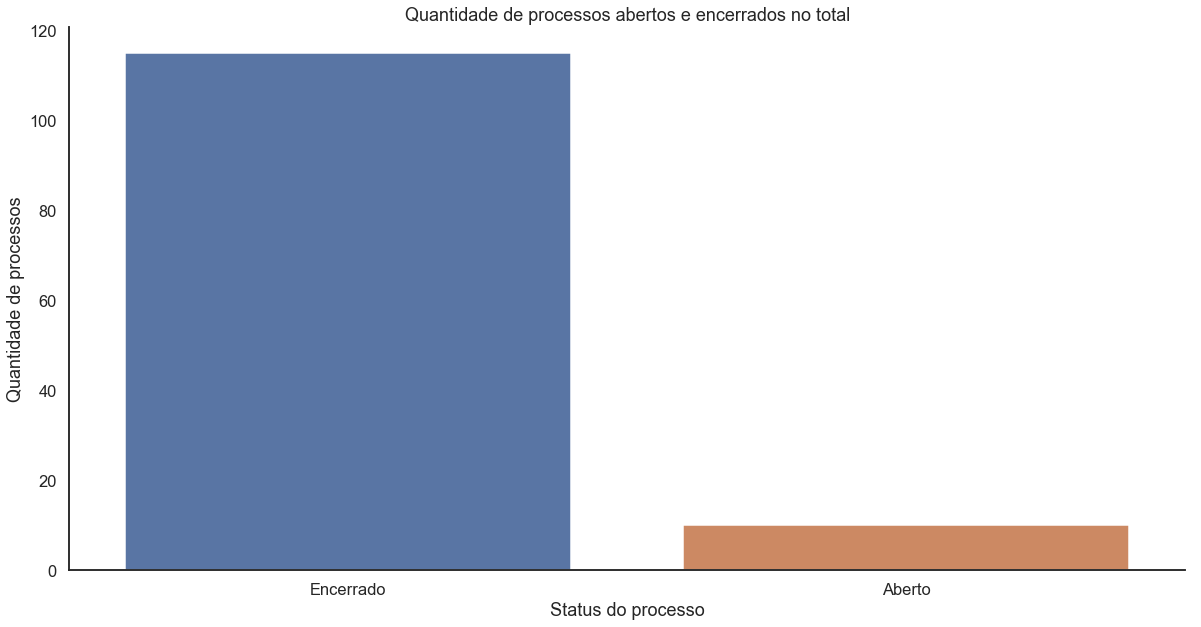

In [13]:
ax = sns.countplot(x='Status_Processo', data=base_dados)
sns.despine(offset=0, trim=False)
ax.set_title("Quantidade de processos abertos e encerrados no total")
ax.set_ylabel("Quantidade de processos")
ax.set_xlabel("Status do processo")
plt.show()

## Conclusão da análise da quantidade de processos (por status) x Agência

A quantidade de processos encerrados é sem dúvidas superior a quantidade de processos abertos, ainda, como esperado, a empresa IX por se tratar da empresa com maior número de processos, é a que apresenta uma predominância em ambos os status. 

É interessante ainda notar que embora a empresa IX apresente uma maior quantidade de processos, tanto abertos quanto fechados, quando os dados são tratados como porcentagem a empresa VIII apresenta uma maior porcentagem de processos abertos que qualquer outra empresa.

## Análise Quantidade de processos x Ano

In [14]:
anos = base_dados.Exercicio_Apurado.unique() #Anos presentes na base de dados
processos_ano = {} #Dicionário onde as chaves serão os anos e os valores a quantidade de processos respectivos a cada ano
for x in anos:
    processos_ano[x] = len(base_dados[base_dados['Exercicio_Apurado'] == x])

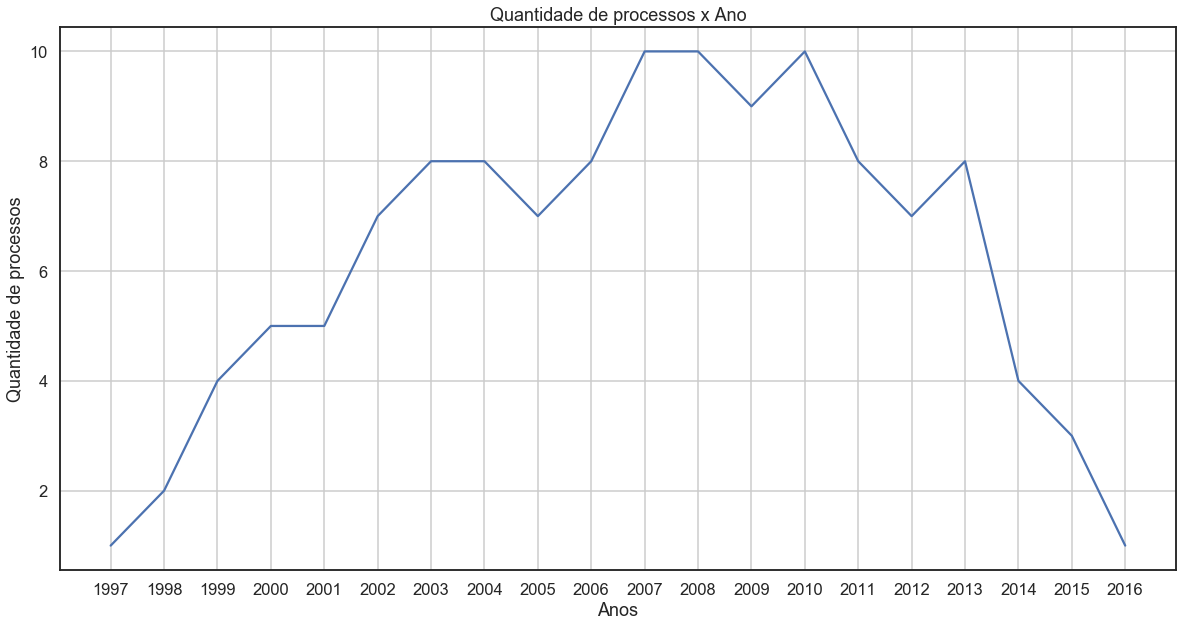

In [15]:
df = pd.DataFrame({'Anos':anos, 'Processos':list(processos_ano.values())}) # Criação de dataframe com os dados específicos para o gráfico
ax = sns.lineplot(data=df, x='Anos', y='Processos')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) #Visualização de todos os anos no eixo x
ax.grid(True) # Uso de grid para facilitar a visualização
ax.set_title("Quantidade de processos x Ano")
ax.set_xlabel('Anos')
ax.set_ylabel('Quantidade de processos')
plt.show()

## Conclusão da análise da quantidade de processos x ano

Como é possível observar no gráfico acima, os anos de 2007, 2008 e 2010 foram os anos que mais apresentaram processos enquanto que os de 1997 e 2016 foram os anos que apresentaram menos processos.

## Análise quantidade de processos (por agência) x ano

In [16]:
# Necessidade de transformação de dados pra criação de um dataframe
anos_list = anos.tolist()
anos_list = anos_list*len(agencias)
anos_list.sort()
anos.sort()
agencias_list = agencias*len(anos)

In [17]:
processo_ano_agencia = [] # Quantidade de processos por ano em casa agência
for x in anos: # A cada ano
    for y in agencias: # Em todas as agências (ou seja, todas as agências em um ano específico)
        processo_ano_agencia.append(len(base_dados[(base_dados['Exercicio_Apurado'] == x) & (base_dados['Agencia'] == y)] ))

In [18]:
df_processo_ano_agencia = pd.DataFrame({'Anos':anos_list, 'Agencias':agencias_list, 'Quantidade_Processos':processo_ano_agencia})

In [19]:
df = pd.DataFrame({'Anos': anos}) # Necessidade de outro DF com um formato diferente de informações
                                # Inicializado somente com os anos
    
for ag in agencias: # a cada iteração é adicionado uma coluna agência com a quantidade de processos respectivos a cada ano
    aux = df_processo_ano_agencia[df_processo_ano_agencia['Agencias'] == ag].Quantidade_Processos # Variável auxiliar
    df[ag] = aux.values

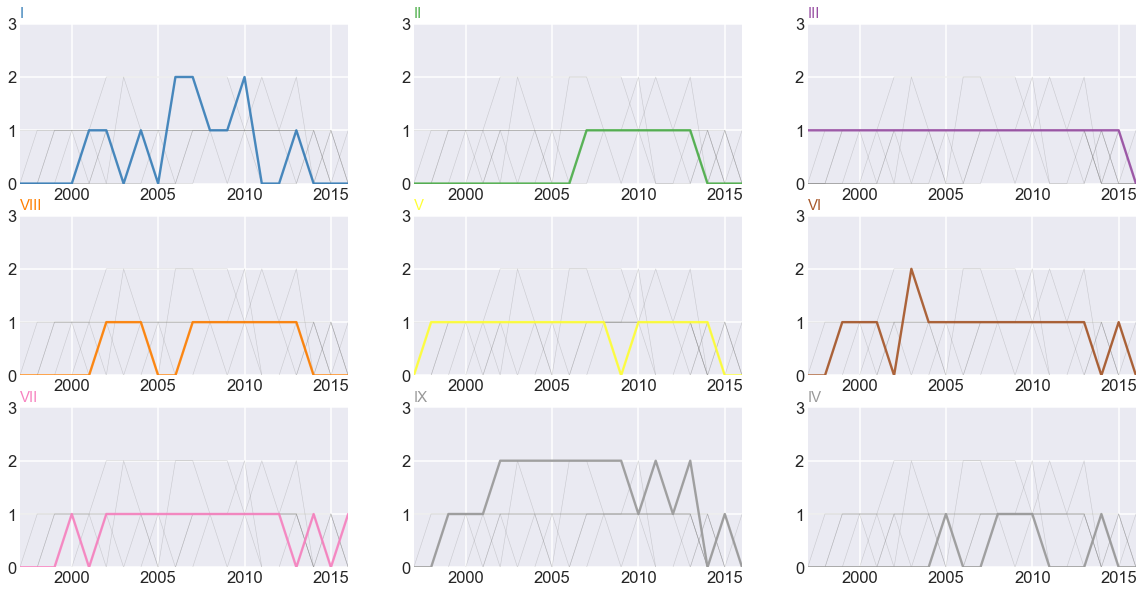

In [20]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1') #Escolha do set de cores
 
# multiple line plot
num=0
for column in df.drop('Anos', axis=1): #A cada iteração dropa-se uma coluna respectiva a cada agência
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # plot every groups, but discreet
    for v in df.drop('Anos', axis=1): #Para cada coluna dropada, criam-se as linhas discretas ao fundo
        plt.plot(df['Anos'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot - Plota a linha principal de cada gráfico
    plt.plot(df['Anos'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    plt.xlim(1997,2016) #determina os limites dos eixos x e y
    plt.ylim(0,3)
 
    
    plt.title(column, loc='left', fontsize=15, fontweight=0, color=palette(num))

## Conclusão da análise da quantidade de processos (por agência) x ano

É possível observar que a quantidade máxima de processos por ano, considerando as agências, é de dois processos por ano. 

É possível ainda concluir que a agência III é a que possui maior constância na quantidade de processos e que apenas as agências I, VI, IX chegam a possuir dois processos por ano.

## Análise da quantidade de processos x Relatores

In [21]:
relatores = base_dados.Relator.unique()
processos_relator = {} #Dicionário: chaves são os relatores e valores são a quantidade de processos respectivos
for x in relatores:
    processos_relator[x] = len(base_dados[base_dados['Relator'] == x])

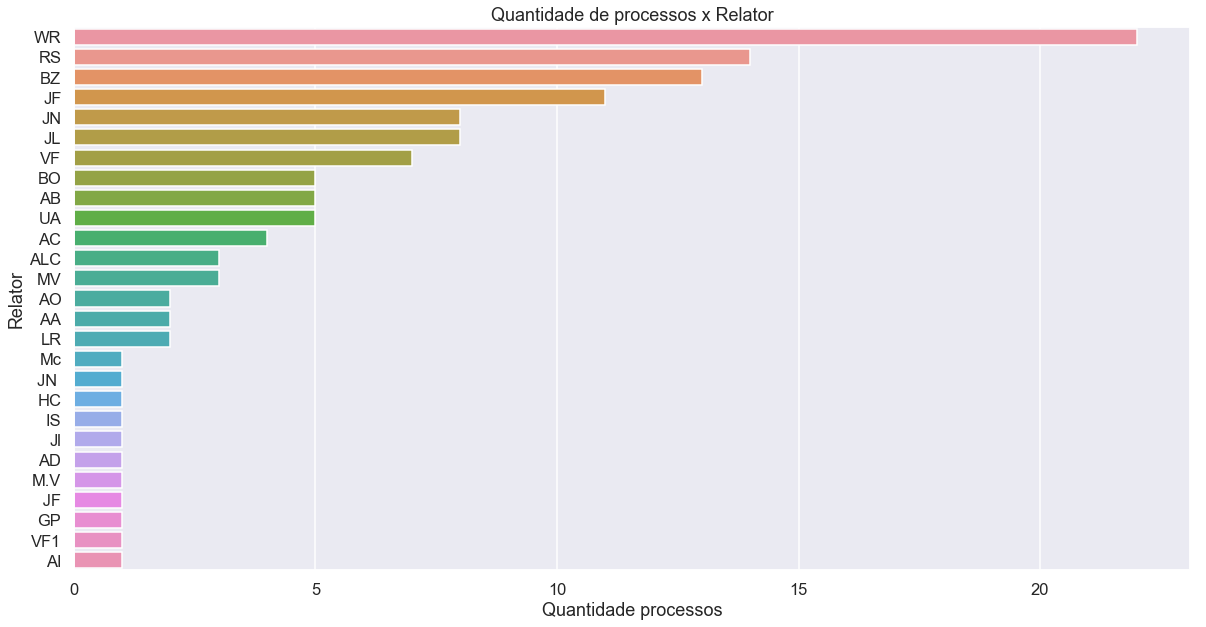

In [22]:
processos_relator = sorted(processos_relator.items(), key = itemgetter(1), reverse = True)# Ordenação do dicionário, me retorna uma lista de tuplas
processos_relator = dict(processos_relator)#Transformo a lista em dicionário

sns.set(style='white', context='talk')
with sns.axes_style('darkgrid'):
    f, ax = plt.subplots()
    sns.barplot(y=list(processos_relator.keys()), x=list(processos_relator.values()), ax=ax, orient='h')
    ax.set_xlabel("Quantidade processos")
    ax.set_ylabel("Relator")
    ax.set_title("Quantidade de processos x Relator")

## Observação

Ao analisar o gráfico, constatou-se que o nome de alguns relatores (JF, MV e VF) aparentavam terem sido inseridos de maneira equivocada, o que levou a criação de outros relatores, por isso, é preciso tratar esses dados.

In [23]:
base_dados.loc[base_dados['Relator'] == ' JF', 'Relator'] = 'JF' # Localizo os dados errados e se faz a substituição
base_dados.loc[base_dados['Relator'] == 'M.V', 'Relator'] = 'MV'
base_dados.loc[base_dados['Relator'] == 'VF1', 'Relator'] = 'VF'

/anaconda3/envs/FGV/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Com a base de dados atualizada, é possível rodar novamente o gráfico, agora com os relatores válidos.

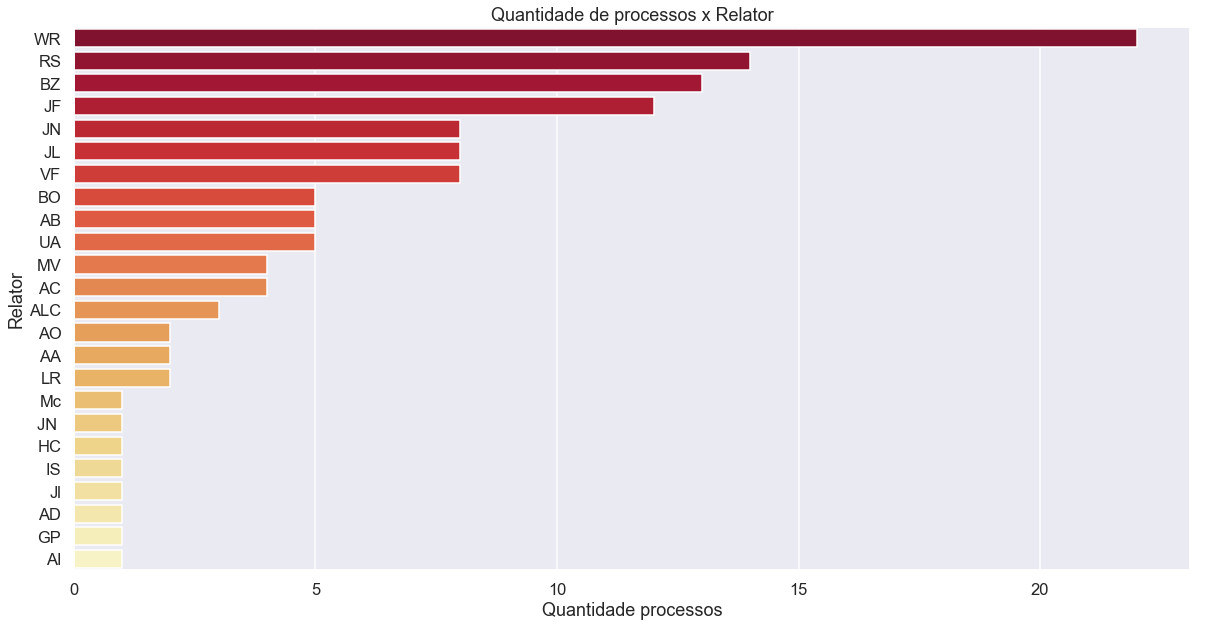

In [24]:
relatores = base_dados.Relator.unique()
processos_relator = {}
for x in relatores:
    processos_relator[x] = len(base_dados[base_dados['Relator'] == x])

processos_relator = sorted(processos_relator.items(), key = itemgetter(1), reverse = True)# Ordenação do dicionário, me retorna uma lista de tuplas
processos_relator = dict(processos_relator)#Transformo a lista em dicionário

sns.set(style='white', context='talk')
with sns.axes_style('darkgrid'):
    f, ax = plt.subplots()
    sns.barplot(y=list(processos_relator.keys()), x=list(processos_relator.values()), ax=ax, orient='h',palette='YlOrRd_r')
    ax.set_xlabel("Quantidade processos")
    ax.set_ylabel("Relator")
    ax.set_title("Quantidade de processos x Relator")

## Conclusão análise da Quantidade de Processos x Relatores

Como relatado anteriormente, foi preciso o tratamento da base de dados devido a inserção, aparentemente erronea, de alguns relatores. Por fim, é possível concluir que o relator WR é que mais processos enquanto diversos outros relatores possuem apenas 1 proceso.

## Análise da Quantidade de Processos (por status) x Relatores

In [25]:
processos_relator_status = {}# Dicionário com as chaves sendo os relatores. Seus valores são dicionários que contém
                            # como chaves os processos Encerrados e Abertos e suas respectivas quantidades como valor.

for x in relatores:
    processos_relator_status[x] = {'Encerrado': len(base_dados[(base_dados['Relator'] == x) & (base_dados['Status_Processo'] == 'Encerrado')]), 'Aberto': len(base_dados[(base_dados['Relator'] == x) & (base_dados['Status_Processo'] == 'Aberto')])}


In [26]:
processos_relator_encerrados = []
processos_relator_abertos = []
for x in processos_relator_status:
    processos_relator_encerrados.append(processos_relator_status[x]['Encerrado'])
    processos_relator_abertos.append(processos_relator_status[x]['Aberto'])

# O gráfico iterativo do plotly pode ser visualizado no link: https://plot.ly/~schirru/0

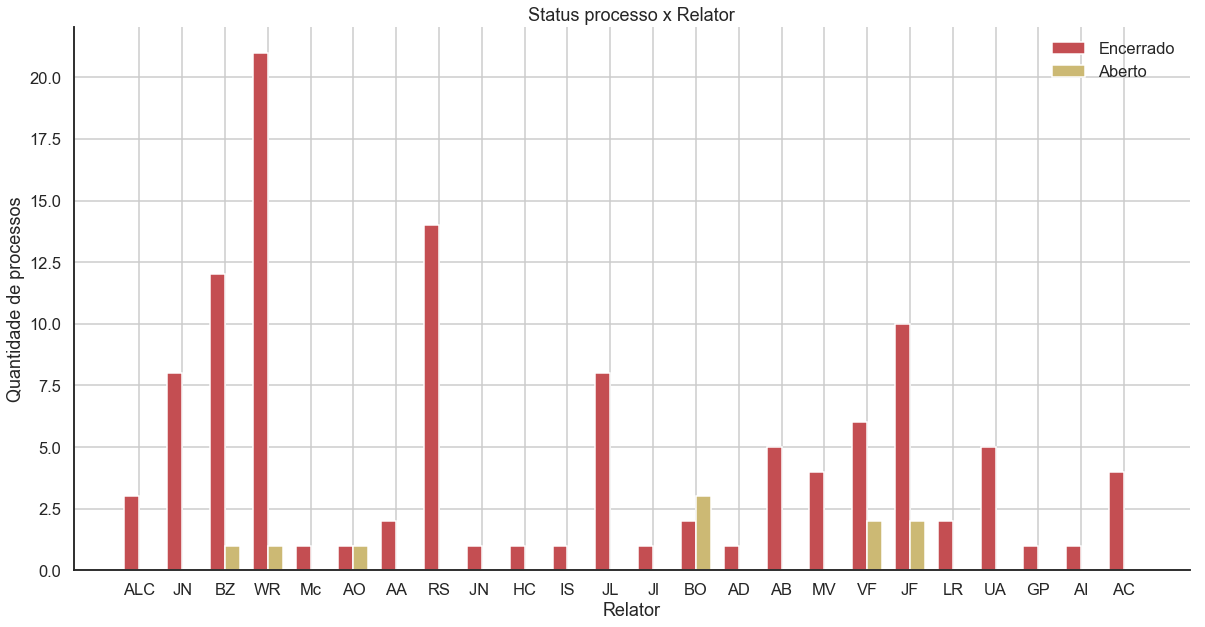

In [27]:
N = len(relatores)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       

fig, ax = plt.subplots()
rects1 = ax.bar(ind, processos_relator_encerrados, width, color='r') # barras contendo processos encerrados

rects2 = ax.bar(ind + width, processos_relator_abertos, width, color='y') # barras contendo processos abertos

ax.set_ylabel('Quantidade de processos')
ax.set_title('Status processo x Relator')
sns.despine(offset=0, trim=False)
ax.set_xticks(ind + width / 2) # Uma barra começa aonde a outra termina
ax.set_xticklabels(relatores)
ax.set_xlabel('Relator')
ax.grid(True)


ax.legend((rects1[0], rects2[0]), ('Encerrado', 'Aberto'))
plt.show()

## Conclusão da Análise da Quantidade de Processos (por status) x Relatores

O relator WR, como já apresentado anteriormente é o que possui um maior número de processos no geral e encerrados. Já o relator BO possui a maior quantidade de processos abertos, sendo inclusive superior a quantidade de processos encerrados pelo mesmo.

## Análise Quantidade de processos x Quantidade de relatores

A relação entre essas duas variáveis é uma relação direta onde a quantidade de processos (125) / quantidade de relatores (24) é de 5,2.

Observando os gráficos das relações da quantidade de processos por relator, pode-se chegar a conclusão de que a média desses dados não é uma boa medida de dispersão, uma vez que existem relatores com um número muito superior de processos e outros com um número inferior.

In [28]:
total_processos / len(relatores)

5.208333333333333

## Análise Quantidade de processo  x Unidade Técnica responsável

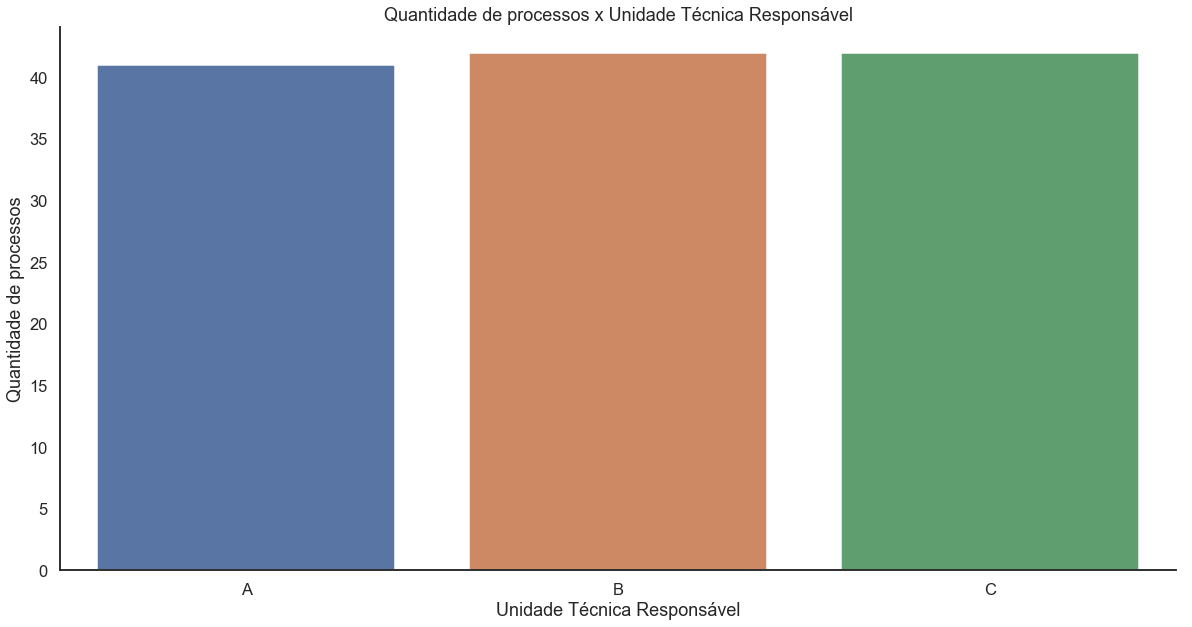

In [29]:
UTR =  base_dados.Unidade_Tecnica_Responsavel.unique()
processos_UTR = {} #Dicionário onde chaves são UTRs e valores são as quantidades de processos respectivos

for x in UTR:
    processos_UTR[x] = len(base_dados[base_dados['Unidade_Tecnica_Responsavel'] == x])
    
f, ax = plt.subplots()
sns.barplot(x=UTR, y=list(processos_UTR.values()), ax=ax)
sns.despine(offset=0, trim=False)
ax.set_ylabel("Quantidade de processos")
ax.set_xlabel("Unidade Técnica Responsável")
ax.set_title("Quantidade de processos x Unidade Técnica Responsável")
plt.show()

## Conclusão da Análise Quantidade de processo  x Unidade Técnica responsável

É possível concluir que a quantidade de processos por Unidade Técnica Responsável é bem distribuída, portanto, a média desses dados poderia ser considerada uma boa medida de dispersão.

## Análise da média de duração geral e por agência

## Observação

Foram observados que vários processos não continham datas de encerramento, mesmo que contassem como encerrados. Para realizar as análises, os processos serão desconsiderados.

In [30]:
base_dados_duracao = base_dados.copy() #Cópia do DF original para poder manipulá-lo
#Remoção dos dados inválidos
base_dados_duracao.drop(base_dados_duracao.loc[base_dados_duracao['Data_Encerramento']=='*'].index, inplace=True)
base_dados_duracao.drop(base_dados_duracao.loc[base_dados_duracao['Data_Encerramento']=='N/D'].index, inplace=True)

inicio = base_dados_duracao['Data_Autuacao']
encerramento = base_dados_duracao['Data_Encerramento']
duracao = encerramento - inicio

base_dados_duracao['Duracao'] = duracao #Insiro uma nova coluna no DF com os valores de duração

### Por agência

/anaconda3/envs/FGV/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


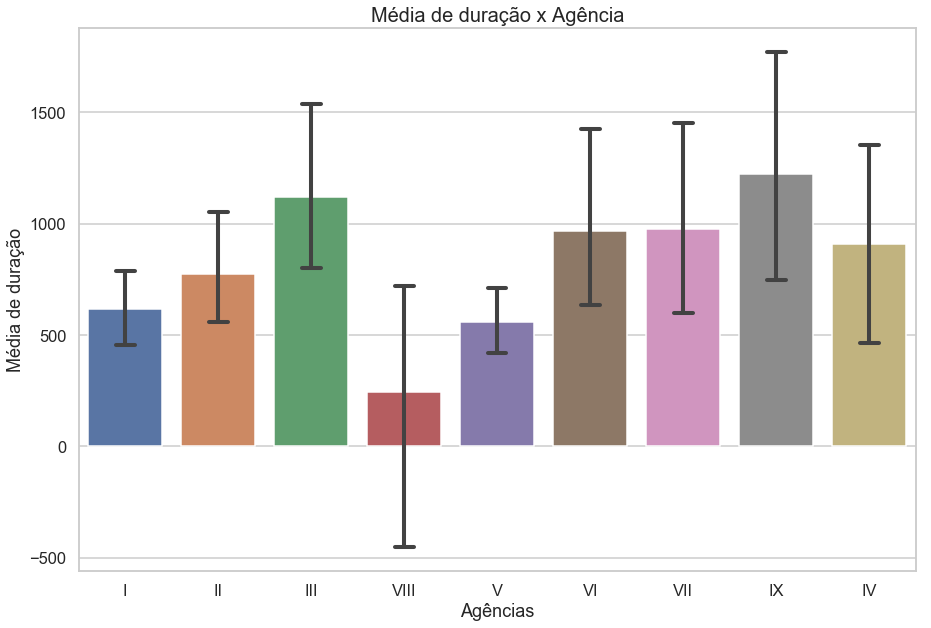

In [31]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style('whitegrid')
sns.barplot(x='Agencia', y='Duracao', data=base_dados_duracao, capsize=.2)
plt.ylabel("Média de duração")
plt.xlabel("Agências")
plt.title("Média de duração x Agência", fontsize= 20)
plt.show()

O gráfico demonstrado acima mostra uma média do tempo de duração dos processos por cada agência, os traços pretos (caps) presentes em cada barra, representam um desvio padrão dos dados. Analisando o gráfico é possível perceber que a agencia de numero VIII apresenta uma discrepância muito grande.

Ao analisar os processos pertencentes a agência de numero VIII, é possível observar que o processo de número 020.133/2014-6 apresenta uma data de encerramento inferior a data de autuação, o que pode representar tanto um erro ao inserir os dados ou uma irregularidade por parte da agência.

### Geral

A média de duração geral pode ser feita de duas maneiras, considerando o valor supostamente irregular apresentado na análise acima, o que faria com que o valor da média fosse mais baixo, ou desconsiderando o valor irregular.

In [32]:
media_irregular = np.mean(base_dados_duracao['Duracao'])

In [33]:
media_irregular

864.125

In [34]:
base_dados_duracao.drop(base_dados_duracao.loc[base_dados_duracao['Duracao']==-1456].index, inplace=True)

In [35]:
media_regular = np.mean(base_dados_duracao['Duracao'])

In [36]:
media_regular

888.5473684210526

Portanto, é possível definir a média geral de duração em:

* Considerando o valor supostamente irregular: 864.125
* Desconsiderando o valor irregular: 888.547

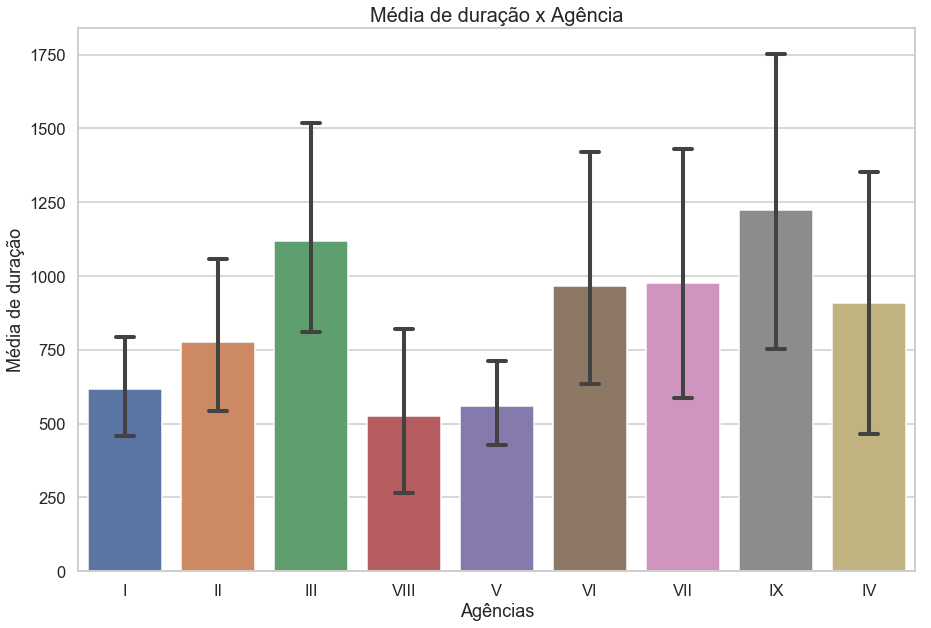

In [37]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style('whitegrid')
sns.barplot(x='Agencia', y='Duracao', data=base_dados_duracao, capsize=.2)
plt.ylabel("Média de duração")
plt.xlabel("Agências")
plt.title("Média de duração x Agência", fontsize= 20)
plt.show()

## Análise da Quantidade responsáveis x Agência

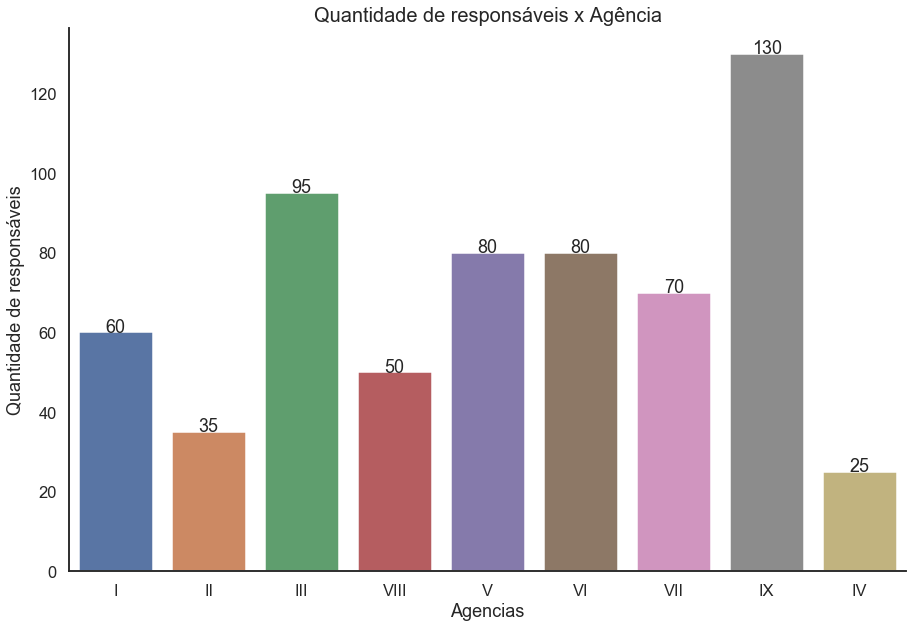

In [38]:
sns.set_style('white')
responsaveis_agencia = {}#Dicionário onde chaves são agências e valores são a quantidade de responsáveis

for x in agencias:
    responsaveis_agencia[x] = sum(base_dados[base_dados['Agencia'] == x].quant_responsaveis)
    
f, ax = plt.subplots()
sns.barplot(x=agencias, y=list(responsaveis_agencia.values()), ax=ax)
sns.despine(offset=0, trim=False)
ax.set_xlabel("Agencias")
ax.set_ylabel("Quantidade de responsáveis")
ax.set_title("Quantidade de responsáveis x Agência", fontsize= 20)
for p in ax.patches: #Loop para inserção do valor em cada barra do gráfico
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:.0f}'.format(height),
            ha="center") 
plt.show()

## Conclusão da Análise da Quantidade responsáveis x Agência

Com base nos dados apresentados acima e na análise dos gráficos das quantidade de processos por agência é possível concluir que, por lógica, a agência IX deveria apresentar o maior número de responsáveis, como demonstrado no gráfico acima.

## Análise da quantidade de responsáveis (por agência) x ano

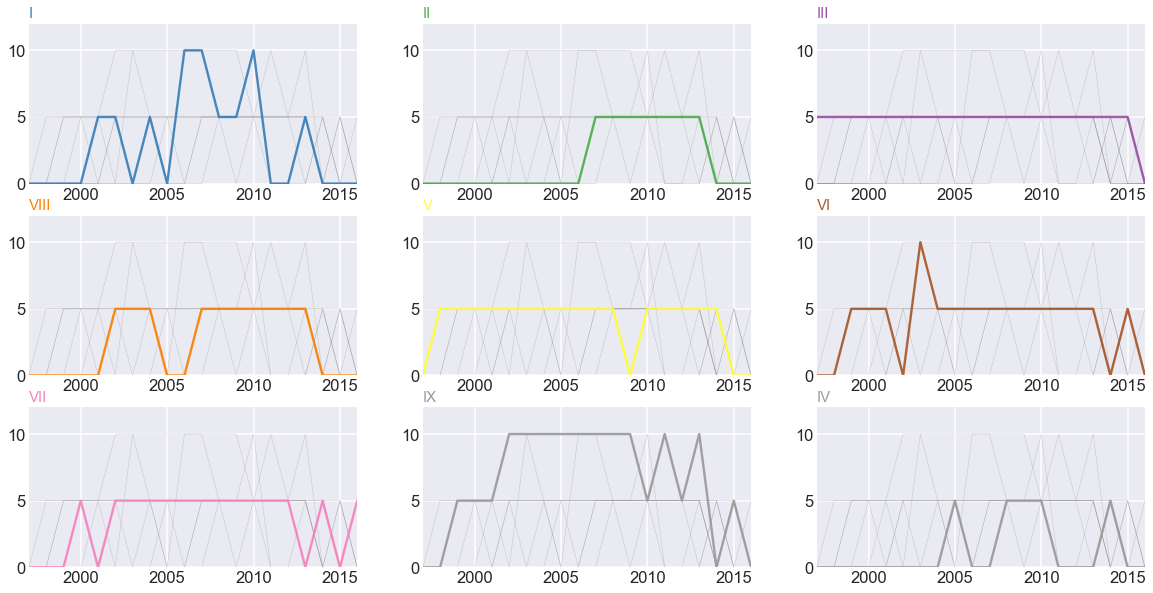

In [39]:
#Necessidade de manipulação dos dados pra criação de um novo DF
anos_list = anos.tolist()
anos_list = anos_list*len(agencias)
anos_list.sort()
anos.sort()
agencias_list = agencias*len(anos)

responsaveis_ano_agencia = []
for x in anos:
    for y in agencias:
        responsaveis_ano_agencia.append(sum(base_dados[(base_dados['Exercicio_Apurado'] == x) & (base_dados['Agencia'] == y)].quant_responsaveis))
        
df_responsaveis_ano_agencia = pd.DataFrame({'Anos':anos_list, 'Agencias':agencias_list, 'Quantidade_Responsaveis':responsaveis_ano_agencia})

df_teste = pd.DataFrame({'Anos': anos})
for ag in agencias:
    aux = df_responsaveis_ano_agencia[df_responsaveis_ano_agencia['Agencias'] == ag].Quantidade_Responsaveis
    df_teste[ag] = aux.values


plt.rcParams['figure.figsize'] = [20, 10]

plt.style.use('seaborn-darkgrid')
 
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df_teste.drop('Anos', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # plot every groups, but discreet
    for v in df_teste.drop('Anos', axis=1):
        plt.plot(df_teste['Anos'], df_teste[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df_teste['Anos'], df_teste[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    
    plt.xlim(1997,2016)
    plt.ylim(0,12)
 
 
    
    plt.title(column, loc='left', fontsize=15, fontweight=0, color=palette(num) )

## Conclusão da análise da quantidade de responsáveis (por agência) x ano

É possível concluir que o gráfico apresentado acima está correlacionado ao gráfico apresentado na análise da quantidade de processo em cada agência por ano, uma vez que, segundo os dados fornecidos, o número de responsáveis é uma constante para todos os processos.

## Análise da quantidade de responsáveis x Relator

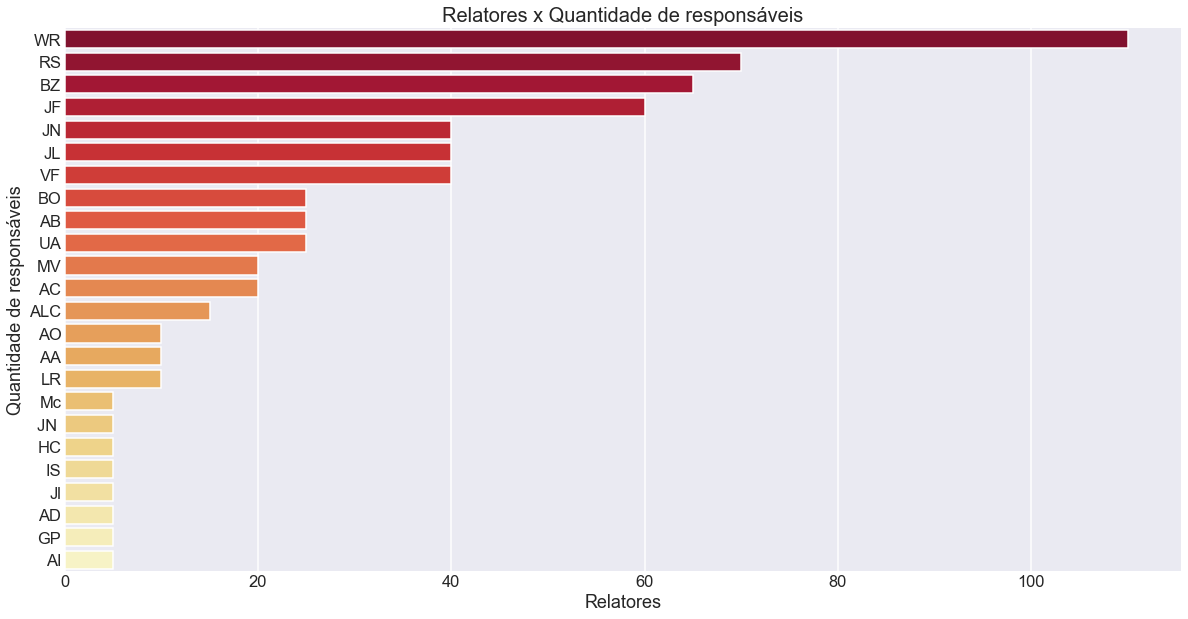

In [40]:
responsaveis_relator = {}#Dicionário com chaves sendo relatores e valores sendo quantidade de responsáveis

for x in relatores:
    responsaveis_relator[x] = sum(base_dados[base_dados['Relator'] == x].quant_responsaveis)
    
responsaveis_relator = sorted(responsaveis_relator.items(), key = itemgetter(1), reverse = True)# Ordenação do dicionário, me retorna uma lista de tuplas
responsaveis_relator = dict(responsaveis_relator)#Transformo a lista em dicionário
    
with sns.axes_style('darkgrid'):
    f, ax = plt.subplots()
    sns.barplot(y=list(responsaveis_relator.keys()), x=list(responsaveis_relator.values()), ax=ax,palette='YlOrRd_r')
    
    ax.set_ylabel("Quantidade de responsáveis")
    ax.set_xlabel("Relatores")
    plt.title("Relatores x Quantidade de responsáveis", fontsize= 20)

## Conclusão da análise da quantidade de responsáveis x Relator

Como citado anteriormente, a quantidade de responsáveis por processo é uma constante, por isso, o gráfico se correlaciona com o gráfico da quantidade de processos por relator. Pode-se concluir ambos são grandezas proporcionais, ou seja, a medida que o número de processos por relator aumenta, o número de responsáveis por relator também aumentará.

## Análise da Quantidade de responsaveis x Unidade Técnica Responsável

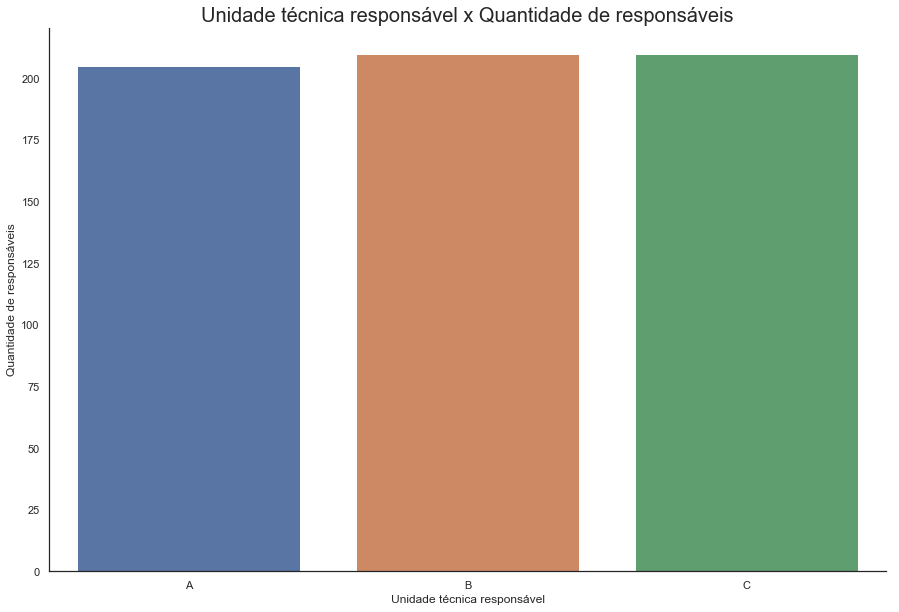

In [41]:
sns.set(style='white')
responsaveis_UTR = {}#Dicionário com chaves sendo UTRs e valores sendo quantidade de responsáveis

for x in UTR:
    responsaveis_UTR[x] = sum(base_dados[base_dados['Unidade_Tecnica_Responsavel'] == x].quant_responsaveis)

plt.rcParams['figure.figsize'] = [15, 10]

f, ax = plt.subplots()
sns.barplot(x=UTR, y=list(responsaveis_UTR.values()), ax=ax)
sns.despine(offset=0, trim=False)
ax.set_ylabel("Quantidade de responsáveis")
ax.set_xlabel("Unidade técnica responsável")
plt.title("Unidade técnica responsável x Quantidade de responsáveis", fontsize= 20)
plt.show()

## Conclusão da análise da quantidade de responsáveis x Unidade Técnica Responsável

A análise demonstrou que os dados estão bem distribuídos entre todas as unidades

## Análise da Quantidade de responsáveis x Unidade Tecnica por Agir

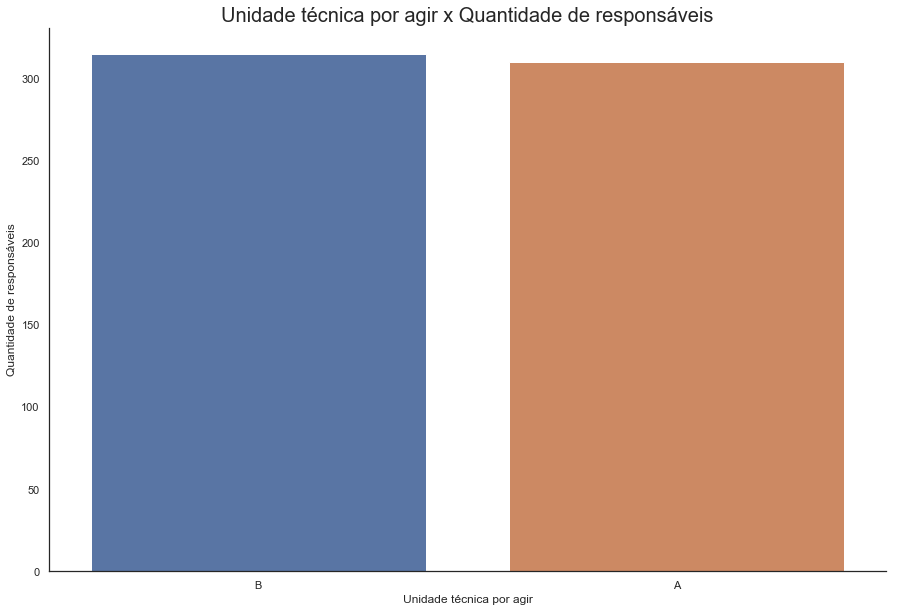

In [42]:
sns.set(style='white')
UTA = base_dados.Unidade_Tecnica_Por_Agir.unique()

responsaveis_UTA = {}#Dicionário com chaves sendo UTAs e valores sendo quantidade de responsáveis

for x in UTA:
    responsaveis_UTA[x] = sum(base_dados[base_dados['Unidade_Tecnica_Por_Agir'] == x].quant_responsaveis)

plt.rcParams['figure.figsize'] = [15, 10]
with sns.axes_style('white'):
    f, ax = plt.subplots()
    sns.barplot(x=UTA, y=list(responsaveis_UTA.values()), ax=ax)
    ax.set_ylabel("Quantidade de responsáveis")
    ax.set_xlabel("Unidade técnica por agir")
    plt.title("Unidade técnica por agir x Quantidade de responsáveis", fontsize= 20)
    sns.despine(offset=0, trim=False);


## Conclusão da Análise da Quantidade de responsáveis x Unidade Tecnica por Agir

A análise mostra os dados bem distribuidos entre as unidades presentes.

## Análise da Decisão normativa x Agência

In [43]:
#Necessidade de manipulação de dados pra criação de um novo DF
decisoes = base_dados.decisao_normativa.unique()
decisoes_list = decisoes.tolist()
decisoes_list = decisoes_list*len(agencias)
decisoes_list.sort()
agencias_list = agencias*len(decisoes)

In [44]:
decisoes_qnt_agencia = []
decisoes.sort()
for x in decisoes:
    for y in agencias:
        decisoes_qnt_agencia.append(len(base_dados[(base_dados['decisao_normativa'] == x) & (base_dados['Agencia'] == y)] ))


df_decisoes_qnt_agencia = pd.DataFrame({'Decisoes':decisoes_list, 'Agencias':agencias_list, 'Quantidade':decisoes_qnt_agencia})


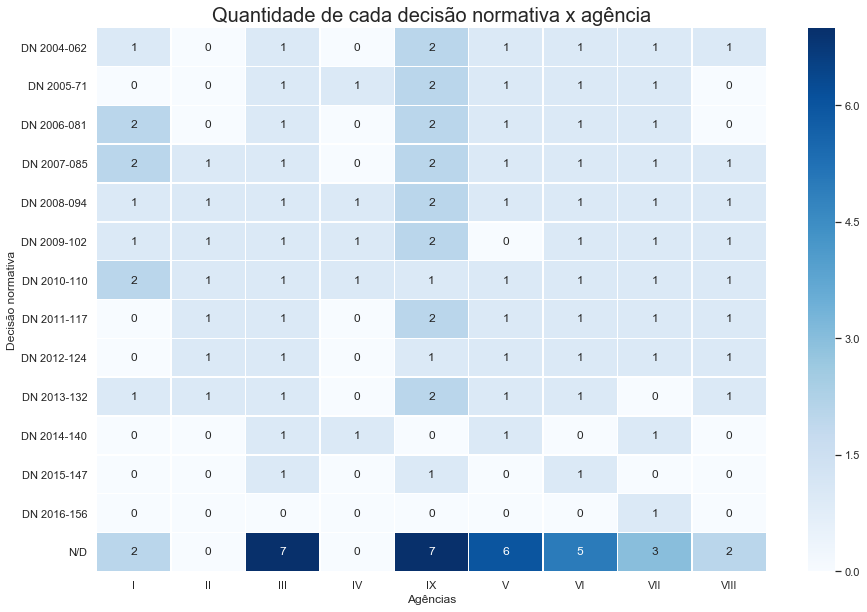

In [45]:
df_heatmap = df_decisoes_qnt_agencia.pivot("Decisoes", "Agencias", "Quantidade") #Pivotamento do dataframe

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_heatmap, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Blues")
ax.set_ylabel("Decisão normativa")
ax.set_xlabel("Agências")
ax.set_title("Quantidade de cada decisão normativa x agência", fontsize= 20)
plt.show()

## Conclusão da análise da Decisão normativa x Agência

Foi optado por se usar um gráfico de calor (heatmap) que mostra, de acordo com a cor (do mais claro pro mais escuro) onde a maior parte das decisões normativas estão presentes. 

Conclui-se que das 9 agências presentes, 5 delas apresentam dados não demonstrados como a maioria de suas decisões normativas, além disso, a agência IX é a que mais apresenta decisões normativas. Enquanto a agência II é a que menos apresenta decisões normativas.

## Análise da decisão normativa x Ano

In [46]:
#Necessidade de manipulação de dados pra criação de um novo DF
decisoes = base_dados.decisao_normativa.unique()
decisoes_list = decisoes.tolist()
decisoes_list = decisoes_list*len(anos)
decisoes_list.sort()
anos_list = anos.tolist()*len(decisoes)

decisoes_qnt_anos = []
decisoes.sort()

for x in decisoes:
    for y in anos:
        decisoes_qnt_anos.append(len(base_dados[(base_dados['Exercicio_Apurado'] == y) & (base_dados['decisao_normativa'] == x)] ))
df_decisoes_qnt_anos = pd.DataFrame({'Decisoes':decisoes_list, 'Anos':anos_list, 'Quantidade':decisoes_qnt_anos})

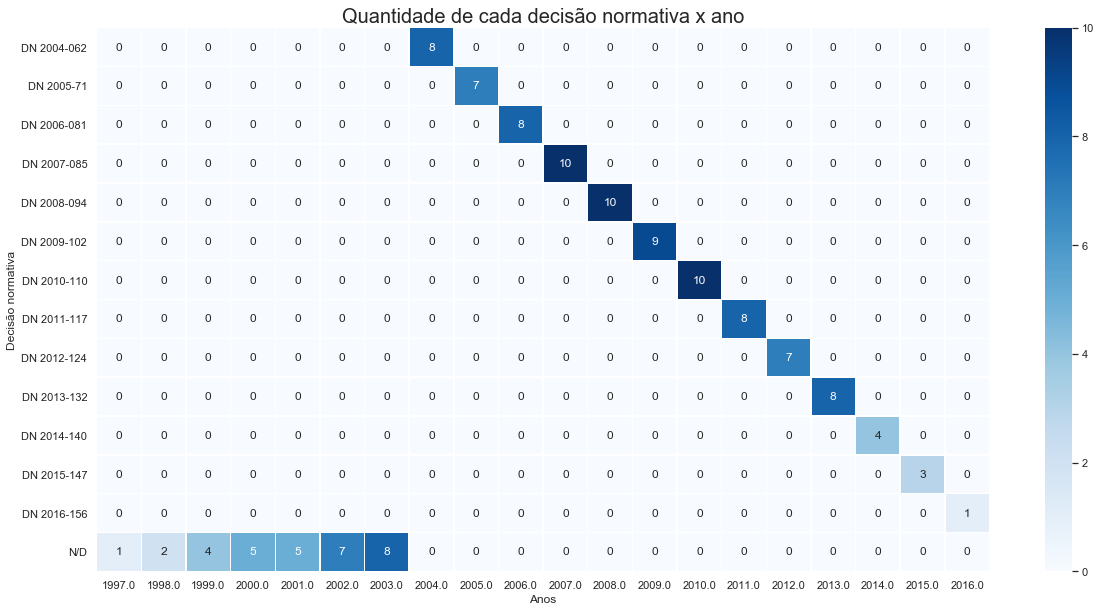

In [47]:
df_heatmap = df_decisoes_qnt_anos.pivot("Decisoes", "Anos", "Quantidade")#Pivotamento do dataframe

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_heatmap, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Blues")
ax.set_ylabel("Decisão normativa")
ax.set_xlabel("Anos")
ax.set_title("Quantidade de cada decisão normativa x ano", fontsize= 20)
plt.show()

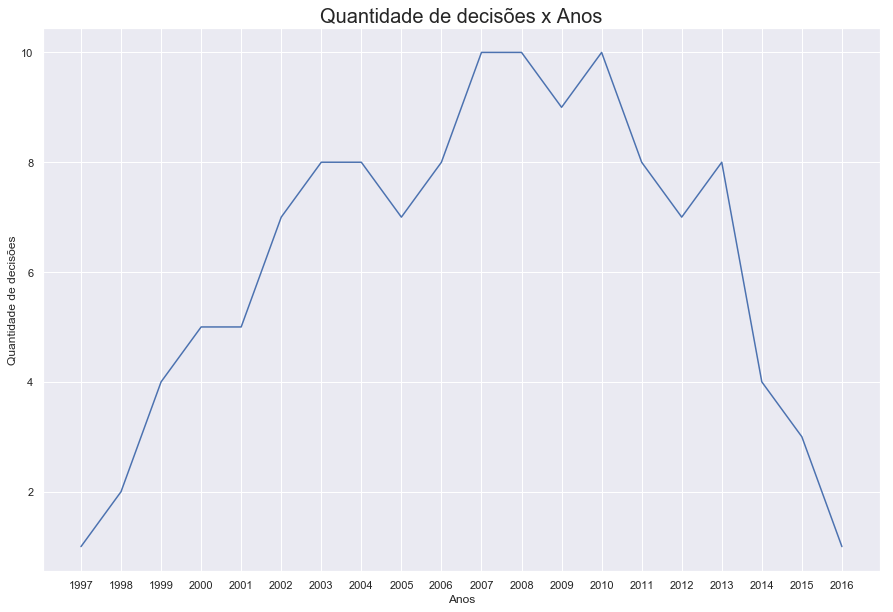

In [48]:
decisoes_ano = {}#Dicionário onde chaves são as anos e os valores a quantidade de decisões
for x in anos:
    decisoes_ano[x] = len(base_dados[base_dados['Exercicio_Apurado'] == x].decisao_normativa)

plt.rcParams['figure.figsize'] = [15, 10]    
df = pd.DataFrame({'Anos':anos, 'Decisoes':list(decisoes_ano.values())})
with sns.axes_style('darkgrid'):
    ax = sns.lineplot(data=df, x='Anos', y='Decisoes')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set_ylabel("Quantidade de decisões")
    ax.set_xlabel("Anos")
    ax.set_title("Quantidade de decisões x Anos", fontsize= 20)


## Conclusão da análise da decisão normativa x Ano

Usando também um heatmap é possível analisar a quantidade de cada decisão normativa por ano. Pelo gráfico conclui-se uma informação da qual não se tinha certeza, o nome de cada decisão contém o prefixo de seu ano, dessa maneira, somente um tipo de decisão aparece por ano. 

É possível ainda ver que a quantidade de decisões é maior nos anos de 2007 até 2010, enquanto o período de 2014 a 2016 apresenta as menores quantidades de decisões normativas.

O período de 1997 até 2003 possuim 32 processos sem decisões, o que equivale a 25,6% dos processos.

## Análise da Decisão normativa x Relatores

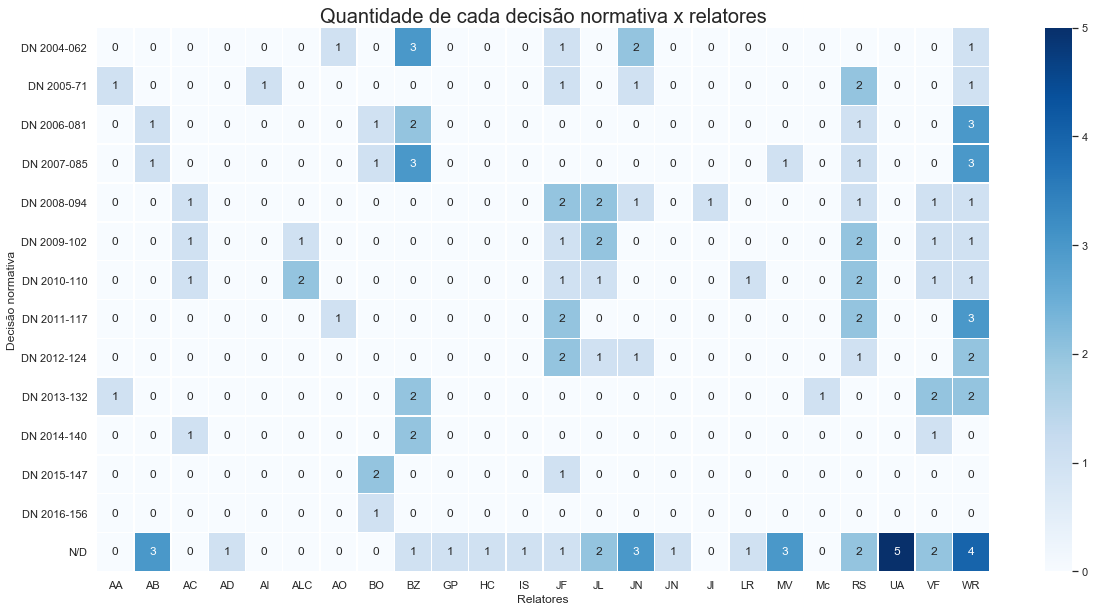

In [49]:
#Necessidade de manipulação de dados pra criação de um novo DF
decisoes = base_dados.decisao_normativa.unique()
decisoes_list = decisoes.tolist()
decisoes_list = decisoes_list*len(relatores)
decisoes_list.sort()
relatores_list = relatores.tolist()*len(decisoes)
decisoes.sort()

decisoes_qnt_relatores = []
for x in decisoes:
    for y in relatores:
        decisoes_qnt_relatores.append(len(base_dados[(base_dados['decisao_normativa'] == x) & (base_dados['Relator'] == y)] ))
df_decisoes_qnt_anos = pd.DataFrame({'Decisoes':decisoes_list, 'Relatores':relatores_list, 'Quantidade':decisoes_qnt_relatores})

df_heatmap = df_decisoes_qnt_anos.pivot("Decisoes", "Relatores", "Quantidade")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_heatmap, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Blues")
ax.set_ylabel("Decisão normativa")
ax.set_xlabel("Relatores")
ax.set_title("Quantidade de cada decisão normativa x relatores", fontsize= 20)
plt.show()

## Conclusão da análise da decisão normativa x relatores

Como a decisão normativa está diretamente ligada a cada processo, o relator WR possui um maior número de decisões, outro ponto a se notar é que o relator UA possui ao todo 5 decisões normativas sendo que todas não foram demonstradas.

## Análise da Decisão normativa x Unidade técnica responsável

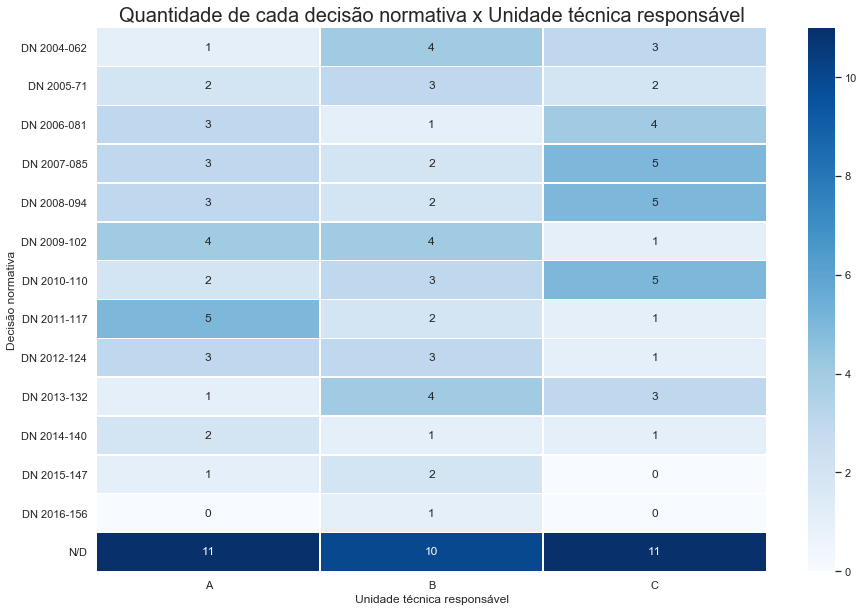

In [50]:
#Necessidade de manipulação de dados pra criação de um novo DF
decisoes = base_dados.decisao_normativa.unique()
decisoes_list = decisoes.tolist()
decisoes_list = decisoes_list*len(UTR)
decisoes_list.sort()
UTR_list = UTR.tolist()*len(decisoes)
decisoes.sort()

decisoes_qnt_utr = []
for x in decisoes:
    for y in UTR:
        decisoes_qnt_utr.append(len(base_dados[(base_dados['decisao_normativa'] == x) & (base_dados['Unidade_Tecnica_Responsavel'] == y)] ))
df_decisoes_qnt_utr = pd.DataFrame({'Decisoes':decisoes_list, 'UTR':UTR_list, 'Quantidade':decisoes_qnt_utr})

df_heatmap = df_decisoes_qnt_utr.pivot("Decisoes", "UTR", "Quantidade")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_heatmap, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Blues")
ax.set_ylabel("Decisão normativa")
ax.set_xlabel("Unidade técnica responsável")
ax.set_title("Quantidade de cada decisão normativa x Unidade técnica responsável", fontsize= 20)
plt.show()

## Conclusão da análise da decisão normativa x unidade técnica responsável

Os dados apresentados estão bem distribuídos entre as três unidades responsáveis. O número de decisões não demonstradas representam em média 27% das decisões apresentadas em cada unidade.

## Análise da decisão normativa x Unidade técnica por agir

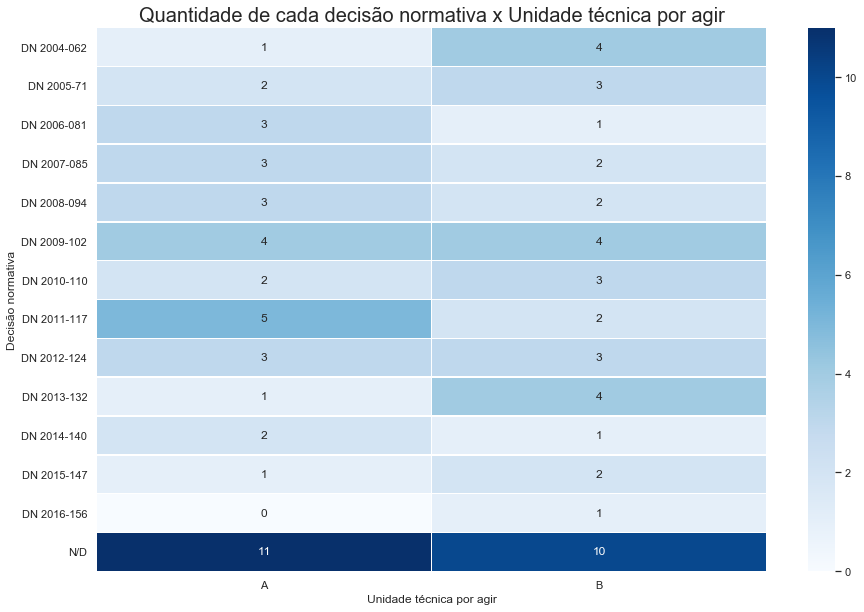

In [51]:
#Necessidade de manipulação de dados pra criação de um novo DF
decisoes = base_dados.decisao_normativa.unique()
decisoes_list = decisoes.tolist()
decisoes_list = decisoes_list*len(UTA)
decisoes_list.sort()
UTA_list = UTA.tolist()*len(decisoes)
decisoes.sort()

decisoes_qnt_uta = []
for x in decisoes:
    for y in UTA:
        decisoes_qnt_uta.append(len(base_dados[(base_dados['decisao_normativa'] == x) & (base_dados['Unidade_Tecnica_Responsavel'] == y)] ))
df_decisoes_qnt_uta = pd.DataFrame({'Decisoes':decisoes_list, 'UTA':UTA_list, 'Quantidade':decisoes_qnt_uta})

df_heatmap = df_decisoes_qnt_uta.pivot("Decisoes", "UTA", "Quantidade")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 10))
plt.title('Decisões normativas x Unidade técnica por agir')
sns.heatmap(df_heatmap, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Blues")
ax.set_ylabel("Decisão normativa")
ax.set_xlabel("Unidade técnica por agir")
ax.set_title("Quantidade de cada decisão normativa x Unidade técnica por agir", fontsize= 20)
plt.show()

## Conclusão da análise da decisão normativa x unidade técnica por agir

Assim como na análise da unidade técnica responsável, o número de decisões não demonstradas é considerável, além disso, pode-se observar que os dados estão bem distribuídos das unidades presentes.

## Análise da Quantidade de deliberações x Agência

In [52]:
#Necessidade de tratamento da base de dados já que existem dados inválidos
base_dados_deliberacao = base_dados.copy()
base_dados_deliberacao.drop(base_dados_deliberacao.loc[base_dados_deliberacao['deliberacoes_quantidade']=='*'].index, inplace=True)

In [53]:
deliberacoes_agencia = {}#Dicionário onde chaves são as agencias e os valores a quantidade de deliberações

for x in agencias:
    deliberacoes_agencia[x] = sum(base_dados_deliberacao[base_dados_deliberacao['Agencia'] == x].deliberacoes_quantidade)

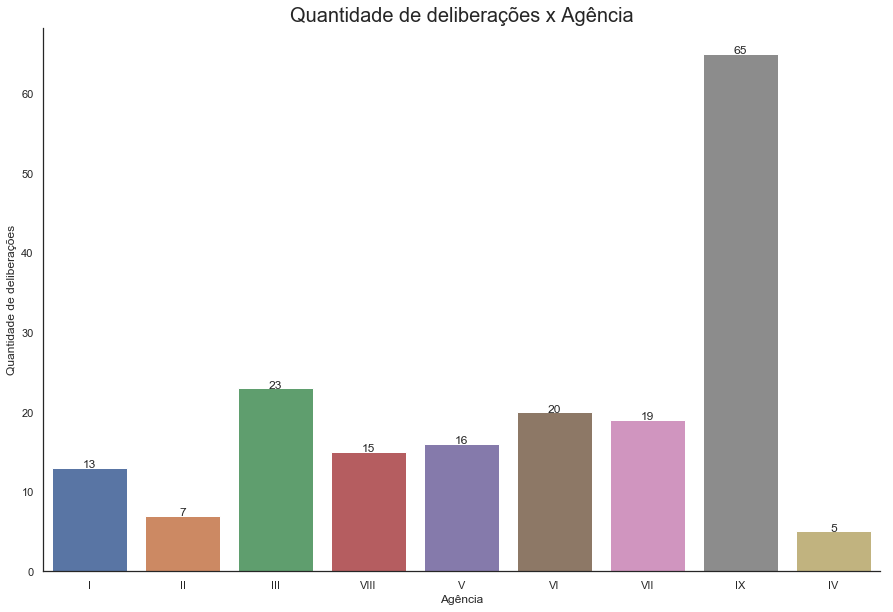

In [54]:
sns.set(style='white')
plt.rcParams['figure.figsize'] = [15, 10]

f, ax = plt.subplots()
sns.barplot(x=agencias, y=list(deliberacoes_agencia.values()), ax=ax)
ax.set_ylabel("Quantidade de deliberações")
ax.set_xlabel("Agência")
ax.set_title("Quantidade de deliberações x Agência", fontsize= 20)
sns.despine(offset=0, trim=False)
for p in ax.patches: #Loop para inserção do valor em cada barra do gráfico
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:.0f}'.format(height),
            ha="center") 

## Conclusão da análise da quantidade de deliberações x agência

A agência IX é a que mais tem deliberações enquanto a agência IV é a agência que menos tem deliberações.

## Análise da quantidade de deliberações (total) x Ano 

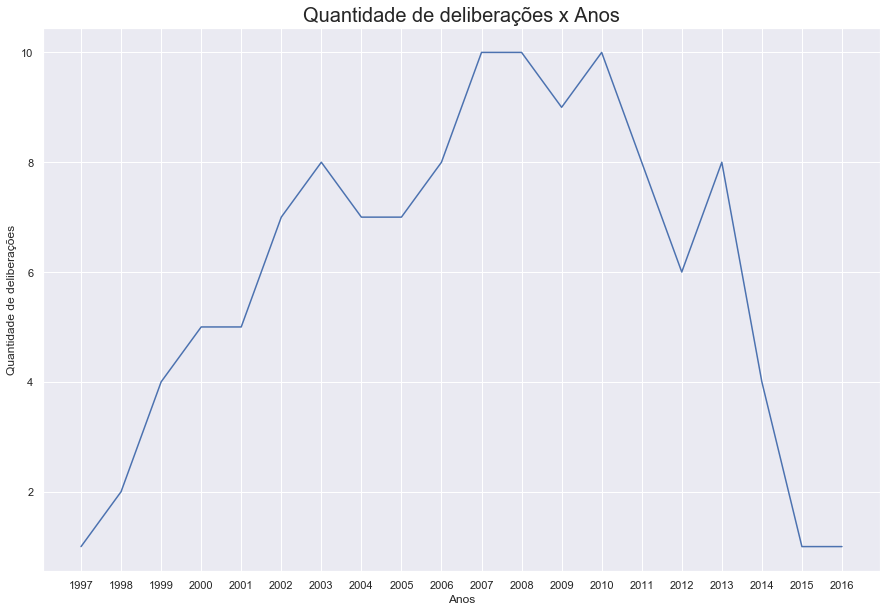

In [55]:
deliberacoes_ano = {}#Dicionário onde chaves são as anos e os valores a quantidade de deliberações
for x in anos:
    deliberacoes_ano[x] = len(base_dados_deliberacao[base_dados_deliberacao['Exercicio_Apurado'] == x].deliberacoes_quantidade)

    
df = pd.DataFrame({'Anos':anos, 'Deliberacoes':list(deliberacoes_ano.values())})
with sns.axes_style('darkgrid'):
    ax = sns.lineplot(data=df, x='Anos', y='Deliberacoes')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set_ylabel("Quantidade de deliberações")
    ax.set_xlabel("Anos")
    ax.set_title("Quantidade de deliberações x Anos", fontsize= 20)


## Conclusão da análise da quantidade de deliberações (total) x ano

A quantidade de deliberações cresce no período de 1997 até 2003 quando tem uma pequena regressão, alcança seu ponto mais alto em 2007 quando se estabiliza até 2010, após esse período, o número de deliberações começa a despencar até 2016.

## Análise da quantidade de deliberações (por agência) x ano

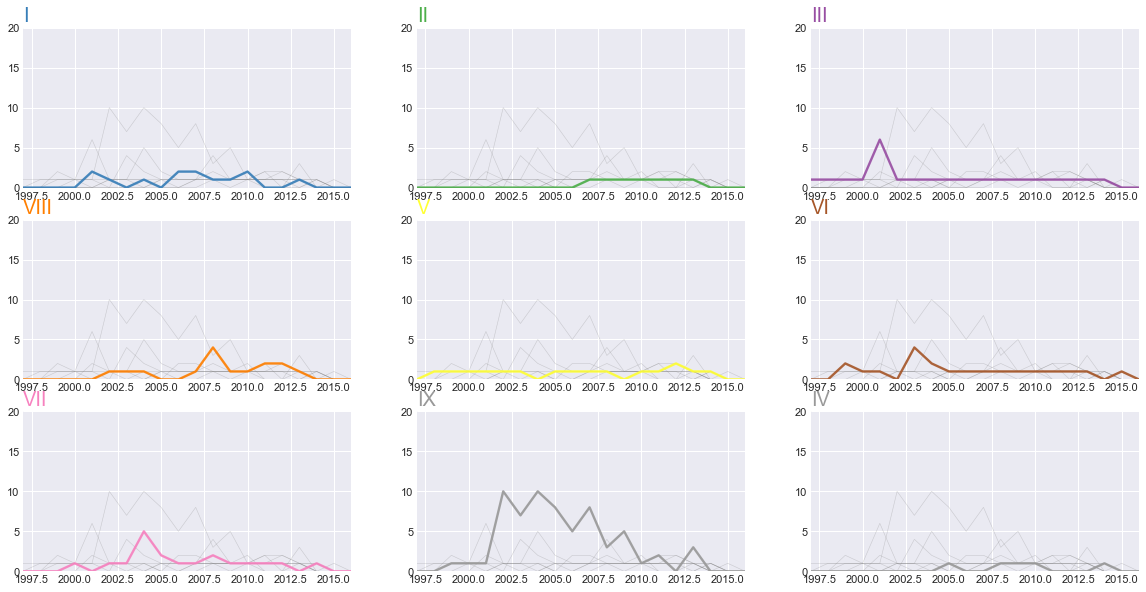

In [56]:
anos_list = anos.tolist()
anos_list = anos_list*len(agencias)
anos_list.sort()
anos.sort()
agencias_list = agencias*len(anos)


deliberacoes_ano_agencia = []
for x in anos:
    for y in agencias:
        deliberacoes_ano_agencia.append(sum(base_dados_deliberacao[(base_dados_deliberacao['Exercicio_Apurado'] == x) & (base_dados_deliberacao['Agencia'] == y)].deliberacoes_quantidade))

df_deliberacoes_ano_agencia = pd.DataFrame({'Anos':anos_list, 'Agencias':agencias_list, 'Deliberacoes':deliberacoes_ano_agencia})

df_teste = pd.DataFrame({'Anos': anos})
for ag in agencias:
    aux = df_deliberacoes_ano_agencia[df_deliberacoes_ano_agencia['Agencias'] == ag].Deliberacoes
    df_teste[ag] = aux.values
    

plt.rcParams['figure.figsize'] = [20, 10]

plt.style.use('seaborn-darkgrid')
 
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df_teste.drop('Anos', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # plot every groups, but discreet
    for v in df_teste.drop('Anos', axis=1):
        plt.plot(df_teste['Anos'], df_teste[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df_teste['Anos'], df_teste[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    
    plt.xlim(1997,2016)
    plt.ylim(0,20)
 
 
    
    plt.title(column, loc='left', fontsize=20, fontweight=0, color=palette(num) )
 


## Conclusões da análise da quantidade de deliberações (por agência) x ano

A maioria das agência com exceção da agência IX mantém a média de deliberações anual abaixo de 5, as agências III e VII chegam a alcançar a marca de 5 deliberações durante um ano, no entanto, não mantém a média no resto do tempo.

A agência II e IV são as que menos possuem deliberações ao longo dos anos.

## Análise da Quantidade de deliberações x Relator

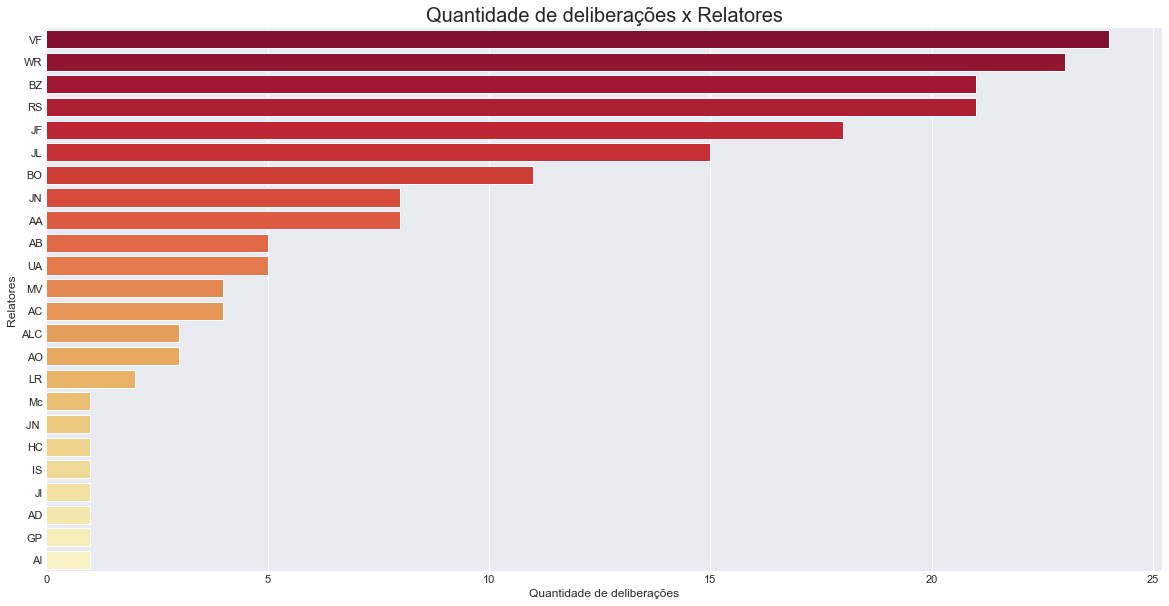

In [57]:
deliberacoes_relator = {}#Dicionário onde chaves são as relatores e os valores a quantidade de deliberações
for x in relatores:
    deliberacoes_relator[x] = sum(base_dados_deliberacao[base_dados_deliberacao['Relator'] == x].deliberacoes_quantidade)

deliberacoes_relator = sorted(deliberacoes_relator.items(), key = itemgetter(1), reverse = True)# Ordenação do dicionário, me retorna uma lista de tuplas
deliberacoes_relator = dict(deliberacoes_relator)#Transformo a lista em dicionário

with sns.axes_style('darkgrid'):
    f, ax = plt.subplots()
    sns.barplot(y=list(deliberacoes_relator.keys()), x=list(deliberacoes_relator.values()), ax=ax, orient='h', palette='YlOrRd_r')
    ax.set_xlabel("Quantidade de deliberações")
    ax.set_ylabel("Relatores")
    plt.title("Quantidade de deliberações x Relatores", fontsize= 20)
    

## Conclusões da análise da quantidade de deliberações x relatores

Diferente do imaginado, o relator WR não é o que possui um maior número de deliberações embora seja o que possui um maior número de processos. Já o relator VF, que possui um número de processos relativamente inferior (no entanto, acima da média) ao relator WR é o que possui uma maior quantidade de deliberações.

Os relatores BZ, RS e JF também possuiam um número de processos acima da média e são destaques na quantidade de deliberações.

## Análise da quantidade deliberações x Unidade técnica responsável

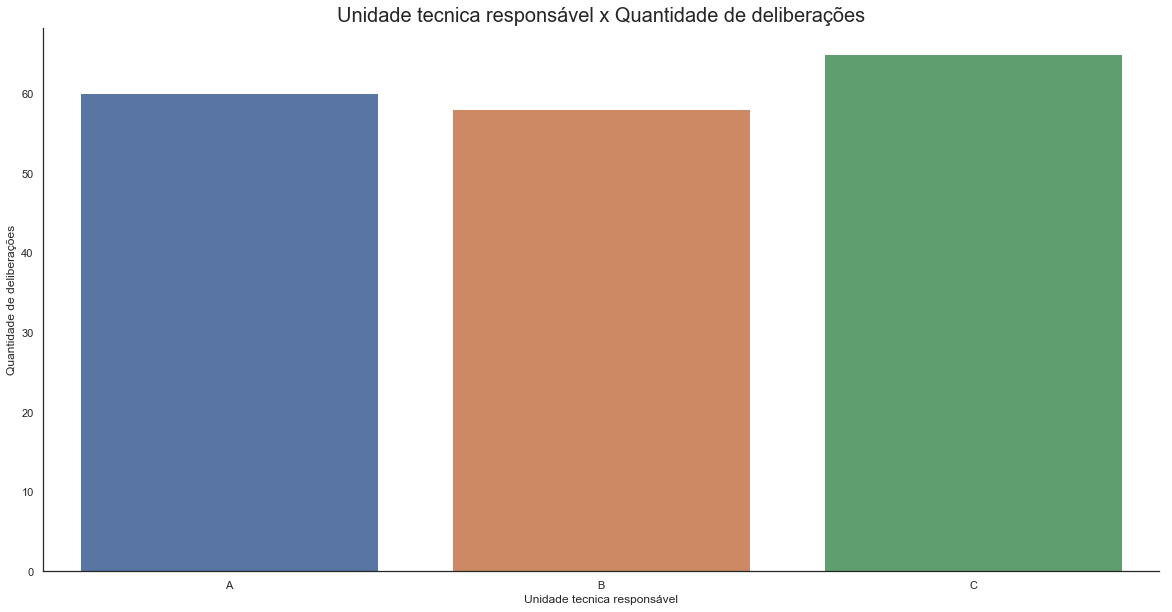

In [58]:
sns.set(style='white')
deliberacoes_UTR = {}#Dicionário onde chaves são as UTRs e os valores a quantidade de deliberações
for x in UTR:
    deliberacoes_UTR[x] = sum(base_dados_deliberacao[base_dados_deliberacao['Unidade_Tecnica_Responsavel'] == x].deliberacoes_quantidade)
    
with sns.axes_style('white'):
    f, ax = plt.subplots()
    sns.barplot(x=UTR, y=list(deliberacoes_UTR.values()), ax=ax)
    sns.despine(offset=0, trim=False);
    ax.set_ylabel("Quantidade de deliberações")
    ax.set_xlabel("Unidade tecnica responsável")
    plt.title("Unidade tecnica responsável x Quantidade de deliberações", fontsize= 20)
    

## Conclusões da análise da quantidade deliberações x Unidade técnica responsável

Novamente os dados mostram-se bem distribuídos entre as unidades, dessa vez com uma leve preferência para a unidade C. 

## Análise da quantidade de deliberações x Unidade técnica por agir

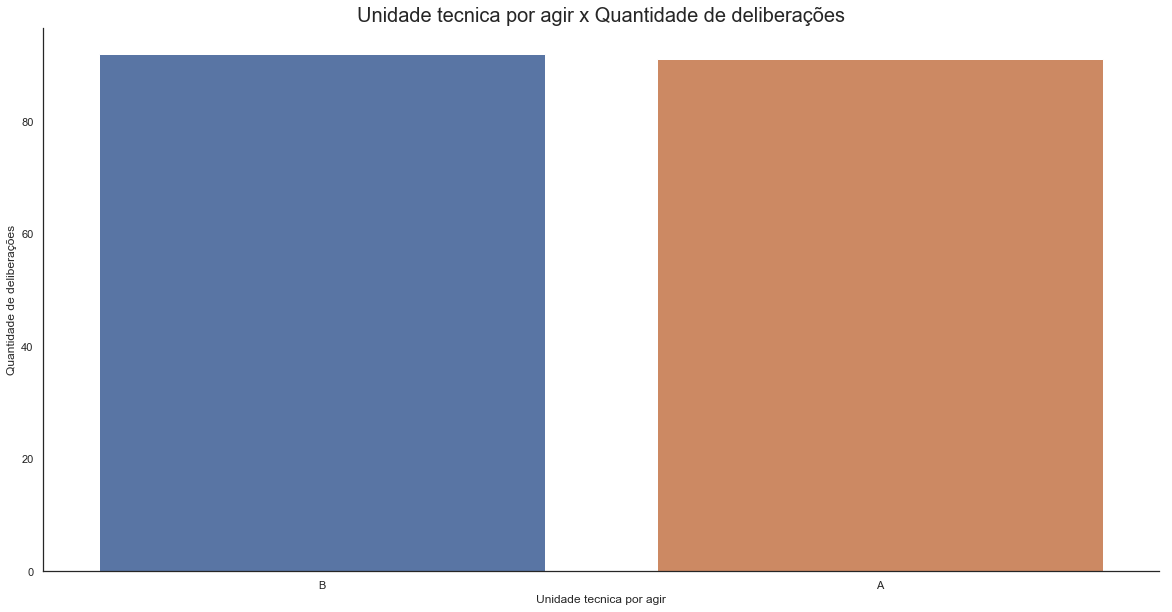

In [59]:
sns.set(style='white')
deliberacoes_UTA = {}#Dicionário onde chaves são as UTAs e os valores a quantidade de deliberações
for x in UTA:
    deliberacoes_UTA[x] = sum(base_dados_deliberacao[base_dados_deliberacao['Unidade_Tecnica_Por_Agir'] == x].deliberacoes_quantidade)
    
with sns.axes_style('white'):
    f, ax = plt.subplots()
    sns.barplot(x=UTA, y=list(deliberacoes_UTA.values()), ax=ax)
    sns.despine(offset=0, trim=False);
    ax.set_ylabel("Quantidade de deliberações")
    ax.set_xlabel("Unidade tecnica por agir")
    plt.title("Unidade tecnica por agir x Quantidade de deliberações", fontsize= 20)
        

## Conclusões da análise da quantidade de deliberações x Unidade técnica por agir

Os dados mostram-se bem distribuídos entre as unidades presentes.

# EXTRAS

## Análise da quantidade de processos x ministério

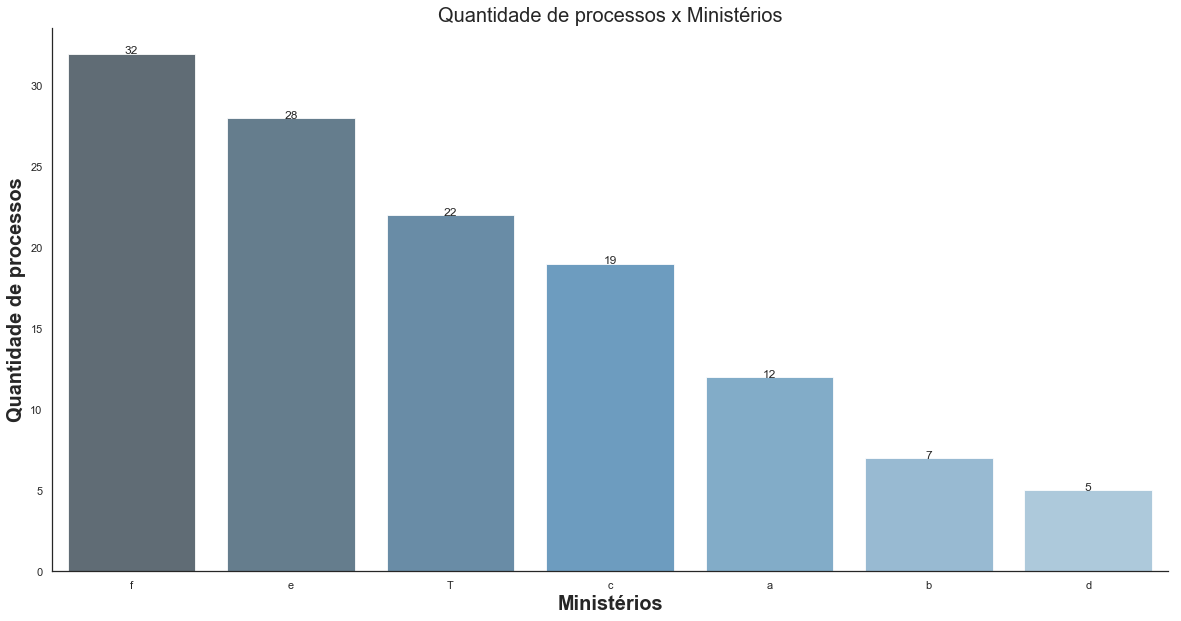

In [60]:
sns.set(style='white')
ministerios = base_dados.Ministerio.unique()
processos_ministerio = {}#Dicionário onde chaves são os ministérios e os valores a quantidade de processos
for x in ministerios:
    processos_ministerio[x] = len(base_dados[base_dados['Ministerio'] == x])

processos_ministerio = sorted(processos_ministerio.items(), key = itemgetter(1), reverse = True)
processos_ministerio = dict(processos_ministerio)

with sns.axes_style('white',{'ytick.direction': 'out'}):
    f, ax = plt.subplots()
    sns.barplot(x=list(processos_ministerio.keys()), y=list(processos_ministerio.values()), ax=ax, alpha=0.8, palette='Blues_d')
    sns.despine(offset=0, trim=False);
    ax.set_ylabel("Quantidade de processos", fontsize = 20, weight = 'bold')
    ax.set_xlabel("Ministérios", fontsize = 20, weight = 'bold')
    plt.title("Quantidade de processos x Ministérios", fontsize= 20)
    aux = 0
    for p in ax.patches: #Loop para inserção do valor em cada barra do gráfico
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:.0f}'.format(height),
                ha="center") 
        p.set_width(0.8)
        aux += 1

## Visualizações de gráficos

O tipo de visualização de gráfico depende do contexto em que os dados estão inseridos. Exemplo: a relação entre a quantidade de processos x ministérios poderia ser demonstrada da maneira acima caso fosse significativo para o contexto saber a ordem da quantidade de processos por ministério, dessa forma, além de estar ordenado, o gráfico apresenta cores que remetem a quantidade, sendo a cor mais escura representando uma maior quantidade, o que facilita a visualização.

Caso a ordem da quantidade de processos não importasse, o gráfico poderia ser ordenado pelo nome dos ministérios e fazer uso de uma paleta de cores mais abrangente, como o gráfico abaixo.

A remoção de um backgroud e a substituição do eixo Y pelos valores inseridos diretamente nas barras deixam a visualização mais minuciosa e menos poluída.

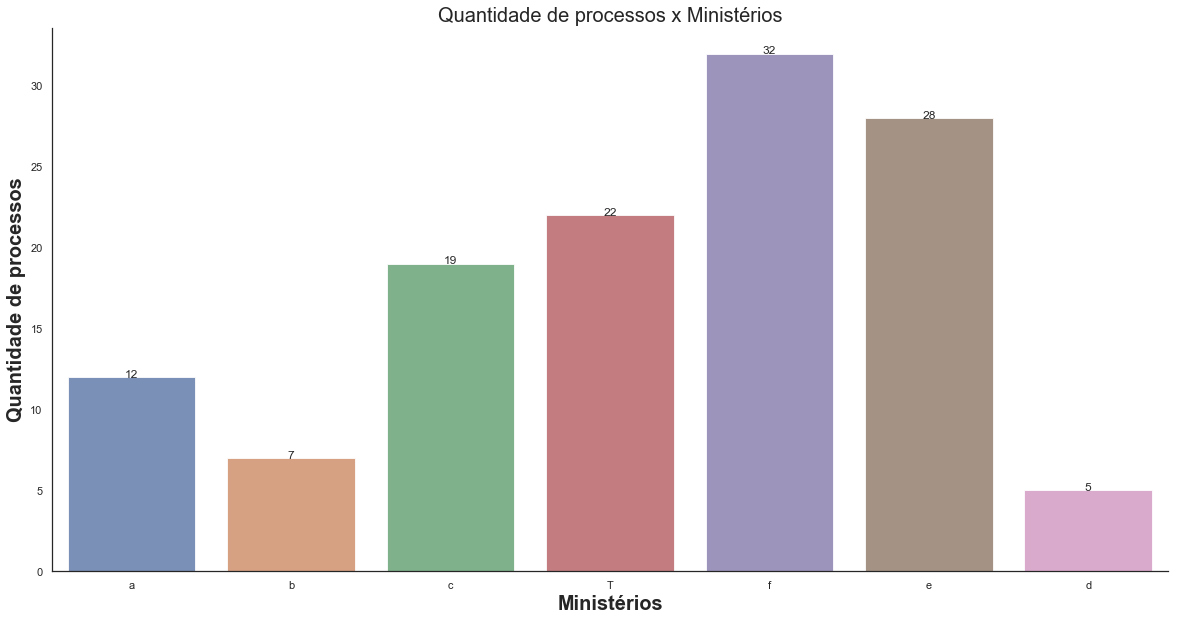

In [61]:
sns.set(style='white')
ministerios = base_dados.Ministerio.unique()
processos_ministerio = {}#Dicionário onde chaves são os ministérios e os valores a quantidade de processos
for x in ministerios:
    processos_ministerio[x] = len(base_dados[base_dados['Ministerio'] == x])

with sns.axes_style('white',{'ytick.direction': 'out'}):
    f, ax = plt.subplots()
    sns.barplot(x=list(processos_ministerio.keys()), y=list(processos_ministerio.values()), ax=ax, alpha=0.8)
    sns.despine(offset=0, trim=False)
    ax.set_ylabel("Quantidade de processos", fontsize = 20, weight = 'bold')
    ax.set_xlabel("Ministérios", fontsize = 20, weight = 'bold')
    plt.title("Quantidade de processos x Ministérios", fontsize= 20)
    aux = 0
    for p in ax.patches: #Loop para inserção da porcentagem em cada barra do gráfico
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:.0f}'.format(height),
                ha="center") 
        p.set_width(0.8)

## Média de duração x ministério

/anaconda3/envs/FGV/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


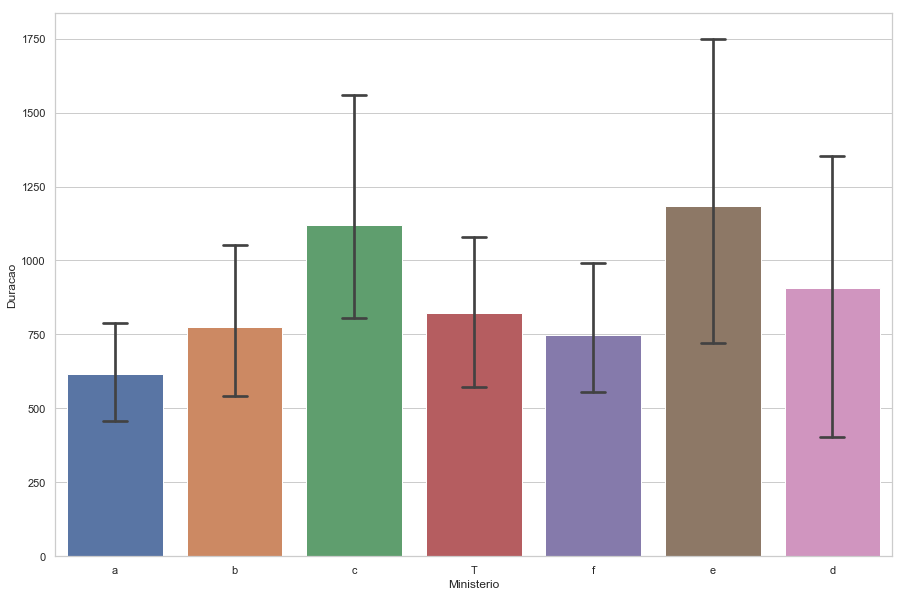

In [62]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style('whitegrid')
sns.barplot(x='Ministerio', y='Duracao', data=base_dados_duracao, capsize=.2)
plt.show()